# Compfest Bizzt 2025 - Bulu Kuduk Merinding


## Setup

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None)

## EDA (Exploratory Data Analysis)

### Produk

In [34]:
df_produk = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/produk_v4.csv')

In [35]:
df_produk

id_produk  kode_sku                                   nama_produk  \
0      P00000001  SKU13967                 JayaMakmur Garam Varian C 50g   
1      P00000002  SKU17931           IndoAgro Sarden Kaleng Spesial 500g   
2      P00000003  SKU04862  SentosaNusantara Kopi Kemasan Varian A 750ml   
3      P00000004  SKU07591             NusantaraPT Makaroni Spesial 200g   
4      P00000005  SKU17958                 IndoJaya Yogurt Spesial 750ml   
...          ...       ...                                           ...   
87501  P00087502  SKU12325                JayaJaya Mayones Spesial 1000g   
87502  P00087503  SKU15705                AgroJaya Yogurt Varian C 750ml   
87503  P00087504  SKU10476               MakmurJaya Gulali Varian C 250g   
87504  P00087505  SKU13244           PTJaya Kentang Goreng Varian C 200g   
87505  P00087506  SKU11936                AbadiAgro Cokelat Spesial 200g   

      kategori_produk             brand  harga_beli  harga_jual  margin  \
0               Garam        JayaMakmur       18022       21300  0.1845   
1       Sarden Kaleng          IndoAgro       17979       21500  0.1935   
2        Kopi Kemasan  SentosaNusantara        5700        7400  0.2955   
3            Makaroni       NusantaraPT       24053       29900  0.2411   
4              Yogurt          IndoJaya       11641       14200  0.2222   
...               ...               ...         ...         ...     ...   
87501         Mayones          JayaJaya        6147        7700  0.2520   
87502          Yogurt          AgroJaya       23005       29900  0.2998   
87503          Gulali        MakmurJaya       11044       13100  0.1875   
87504  Kentang Goreng            PTJaya        2206        2500  0.1527   
87505         Cokelat         AbadiAgro        9857       11800  0.1993   

       ukuran      rasa    kalori  hari_jual_minimal  id_toko  produk_musiman  
0        50 g         -         -                 19        1           False  
1       500 g  Stroberi  480 kkal                 29        1           False  
2      750 ml      Keju  482 kkal                 25        1            True  
3       200 g      Apel  492 kkal                 26        1           False  
4      750 ml      Apel  347 kkal                 30        1           False  
...       ...       ...       ...                ...      ...             ...  
87501  1000 g  Original  297 kkal                 19        7           False  
87502  750 ml      Apel   51 kkal                 18        7           False  
87503   250 g     Pedas  274 kkal                 25        7           False  
87504   200 g      Keju  337 kkal                 28        7           False  
87505   200 g      Keju   96 kkal                 19        7           False  

[87506 rows x 14 columns]

In [36]:
display(df_produk['kategori_produk'].value_counts().reset_index())

kategori_produk  count
0        Air Mineral   2223
1       Daging Segar   2126
2             Yogurt   2065
3               Saos   2054
4      Sayur-Sayuran   2019
5             Nugget   2006
6              Selai   2006
7        Buah-Buahan   2003
8             Permen   1997
9           Makaroni   1995
10       Buah Kering   1964
11        Kopi Bubuk   1950
12              Gula   1926
13             Pasta   1920
14        Mie Instan   1904
15              Keju   1903
16     Minyak Goreng   1886
17           Mayones   1882
18      Kopi Kemasan   1878
19            Kacang   1876
20             Telur   1869
21             Kecap   1869
22               Teh   1862
23    Kentang Goreng   1859
24         Ice Cream   1857
25           Keripik   1857
26       Marshmallow   1839
27      Susu Kemasan   1812
28  Minuman Isotonik   1807
29             Beras   1804
30            Kornet   1775
31             Bihun   1764
32             Garam   1753
33     Seafood Segar   1708
34           Mentega   1680
35       Jus Kemasan   1673
36            Sereal   1616
37              Soda   1570
38     Sarden Kaleng   1556
39        Susu Bubuk   1533
40     Penyedap Rasa   1518
41       Kaldu Jamur   1509
42            Gulali   1487
43           Cokelat   1475
44             Kuaci   1430
45              Krim   1397
46           Biskuit   1397
47              Roti   1393
48             Sirup   1254

In [39]:
category_counts = df_produk['kategori_produk'].value_counts().reset_index()
category_counts.columns = ['Kategori', 'Jumlah Produk']

fig = px.bar(category_counts, x='Kategori', y='Jumlah Produk',
             title='Distribusi Jumlah Produk per Kategori',
             labels={'Kategori': 'Kategori Produk', 'Jumlah Produk': 'Jumlah Produk'},
             template='plotly_white')

fig.show()

In [40]:
store_counts = df_produk['id_toko'].value_counts().reset_index()
store_counts.columns = ['Toko', 'Jumlah Produk']

fig = px.bar(store_counts, x='Toko', y='Jumlah Produk',
             title='Distribusi Jumlah Produk per Toko',
             labels={'Toko': 'Nomor Toko', 'Jumlah Produk': 'Jumlah Produk'},
             template='plotly_white')

fig.show()

In [41]:
fig_scatter_harga = px.scatter(df_produk, x='harga_beli', y='harga_jual',
                               title='Hubungan Harga Beli dan Harga Jual',
                               labels={'harga_beli': 'Harga Beli', 'harga_jual': 'Harga Jual'},
                               template='plotly_white',
                               hover_data=['nama_produk', 'brand', 'kategori_produk'])
fig_scatter_harga.show()

In [42]:
jumlah_sku_unik = df_produk['kode_sku'].nunique()
print(f"Jumlah kode_sku yang unik adalah: {jumlah_sku_unik}")

Jumlah kode_sku yang unik adalah: 18374


In [43]:
fig_box_margin_category = px.box(df_produk, x='kategori_produk', y='margin',
                                 title='Distribusi Margin Keuntungan per Kategori Produk',
                                 labels={'kategori_produk': 'Kategori Produk', 'margin': 'Margin Keuntungan'},
                                 template='plotly_white')
fig_box_margin_category.show()

In [44]:
seasonal_counts = df_produk['produk_musiman'].value_counts().reset_index()
seasonal_counts.columns = ['Produk Musiman', 'Jumlah Produk']

fig = px.bar(seasonal_counts, x='Produk Musiman', y='Jumlah Produk',
             title='Jumlah Produk Musiman vs. Non-Musiman',
             labels={'Produk Musiman': 'Produk Musiman', 'Jumlah Produk': 'Jumlah Produk'},
             template='plotly_white')

fig.show()

### Toko

In [ ]:
df_toko = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/toko.csv')

In [ ]:
df_toko

id_toko  buka_sejak  ukuran  jumlah_sku  jumlah_karyawan         tipe  \
0        1        2015     180        9235                4   permukiman   
1        2        2017     193       12311                5   permukiman   
2        3        2018     220       14501                6     campuran   
3        4        2020     195       13122                5     campuran   
4        5        2022     175        7372                3  perkantoran   
5        6        2024     230       14983                6  perkantoran   
6        7        2025     329       18374                7  jalan_utama   

                                       umur_konsumen  \
0  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   
1  gen_alpha: 0.15, gen_z: 0.35, gen_y: 0.30, gen...   
2  gen_alpha: 0.05, gen_z: 0.25, gen_y: 0.45, gen...   
3  gen_alpha: 0.05, gen_z: 0.30, gen_y: 0.40, gen...   
4  gen_alpha: 0.02, gen_z: 0.20, gen_y: 0.50, gen...   
5  gen_alpha: 0.03, gen_z: 0.15, gen_y: 0.45, gen...   
6  gen_alpha: 0.05, gen_z: 0.25, gen_y: 0.40, gen...   

             jenis_kelamin_konsumen  \
0  perempuan: 0.60, laki-laki: 0.40   
1  perempuan: 0.55, laki-laki: 0.45   
2  perempuan: 0.50, laki-laki: 0.50   
3  perempuan: 0.45, laki-laki: 0.55   
4  perempuan: 0.45, laki-laki: 0.55   
5  perempuan: 0.50, laki-laki: 0.50   
6  perempuan: 0.50, laki-laki: 0.50   

                       penghasilan_konsumen_avg  \
0  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   
1  terbatas: 0.30, menengah: 0.55, tinggi: 0.15   
2  terbatas: 0.15, menengah: 0.65, tinggi: 0.20   
3  terbatas: 0.20, menengah: 0.60, tinggi: 0.20   
4  terbatas: 0.05, menengah: 0.45, tinggi: 0.50   
5  terbatas: 0.10, menengah: 0.40, tinggi: 0.50   
6  terbatas: 0.15, menengah: 0.60, tinggi: 0.25   

                                  pekerjaan_konsumen  \
0  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   
1  pelajar_mahasiswa: 0.30, pekerja_kantoran: 0.3...   
2  pelajar_mahasiswa: 0.15, pekerja_kantoran: 0.6...   
3  pelajar_mahasiswa: 0.20, pekerja_kantoran: 0.5...   
4  pelajar_mahasiswa: 0.05, pekerja_kantoran: 0.8...   
5  pelajar_mahasiswa: 0.05, pekerja_kantoran: 0.8...   
6  pelajar_mahasiswa: 0.10, pekerja_kantoran: 0.7...   

                kebiasaan_konsumen  \
0  impulsif: 0.40, terencana: 0.60   
1  impulsif: 0.45, terencana: 0.55   
2  impulsif: 0.55, terencana: 0.45   
3  impulsif: 0.60, terencana: 0.40   
4  impulsif: 0.65, terencana: 0.35   
5  impulsif: 0.50, terencana: 0.50   
6  impulsif: 0.70, terencana: 0.30   

                                        reaksi_promo  \
0  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
1  pemburu_promo: 0.40, oportunis: 0.40, loyal: 0.20   
2  pemburu_promo: 0.30, oportunis: 0.50, loyal: 0.20   
3  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
4  pemburu_promo: 0.20, oportunis: 0.55, loyal: 0.25   
5  pemburu_promo: 0.25, oportunis: 0.50, loyal: 0.25   
6  pemburu_promo: 0.45, oportunis: 0.40, loyal: 0.15   

                          frekuensi_pembelian  \
0  sering: 0.40, sesekali: 0.50, jarang: 0.10   
1  sering: 0.35, sesekali: 0.55, jarang: 0.10   
2  sering: 0.25, sesekali: 0.60, jarang: 0.15   
3  sering: 0.30, sesekali: 0.50, jarang: 0.20   
4  sering: 0.15, sesekali: 0.70, jarang: 0.15   
5  sering: 0.20, sesekali: 0.65, jarang: 0.15   
6  sering: 0.10, sesekali: 0.60, jarang: 0.30   

                                    waktu_pembelian  
0  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  
1  pagi: 0.20, siang: 0.30, sore: 0.40, malam: 0.10  
2  pagi: 0.15, siang: 0.40, sore: 0.35, malam: 0.10  
3  pagi: 0.10, siang: 0.45, sore: 0.40, malam: 0.05  
4  pagi: 0.10, siang: 0.50, sore: 0.35, malam: 0.05  
5  pagi: 0.15, siang: 0.45, sore: 0.30, malam: 0.10  
6  pagi: 0.15, siang: 0.35, sore: 0.45, malam: 0.05

### Generate Transaksi

In [ ]:
# import pandas as pd
# import numpy as np
# import datetime
# import random
# import os

# # --- BAGIAN 1: PENGATURAN DAN PRA-PEMROSESAN ---
# # Catatan: Kode ini mengasumsikan file CSV di URL ini sudah disesuaikan
# # atau Anda menggunakan file lokal dengan 6 kategori baru.
# print("Membaca file produk...")
# try:
#     produk_df = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/produk_v4.csv')
# except Exception as e:
#     print(f"Gagal membaca file CSV. Pastikan koneksi internet stabil atau file tersedia. Error: {e}")
#     # Hentikan eksekusi jika data produk tidak dapat dimuat
#     exit()


# # Membersihkan dan mengubah tipe data kolom margin (jika ada)
# if 'margin' in produk_df.columns:
#     produk_df['margin'] = pd.to_numeric(produk_df['margin'].astype(str).str.replace('%', ''), errors='coerce') / 100

# # === ATURAN BISNIS BARU ===
# # Definisi data statis berdasarkan aturan baru
# toko_buka = {
#     1: 2015, 2: 2017, 3: 2018, 4: 2020,
#     5: 2022, 6: 2024, 7: 2025
# }

# # [DISESUAIKAN] Masa simpan untuk 6 kategori baru
# masa_simpan_kategori = {
#     'Susu': 365, 'Biskuit': 365, 'Sirup': 365, 'Soda': 365,
#     'Cokelat': 365, 'Roti': 10, 'Default': 365
# }

# # [DISESUAIKAN] Rentang hari produk terjual untuk 6 kategori baru
# hari_jual_range = {
#     'Roti': (1, 7),
#     'Susu': (15, 180), 'Biskuit': (15, 180), 'Sirup': (15, 180),
#     'Soda': (15, 180), 'Cokelat': (15, 180),
#     'Default': (15, 180)
# }

# # [DIPERBARUI] Kalender event diperluas untuk mencakup tahun-tahun mendatang
# events_calendar = {
#     "Ramadan_2023": (datetime.date(2023, 3, 22), datetime.date(2023, 4, 21)),
#     "Natal_2023": (datetime.date(2023, 12, 15), datetime.date(2023, 12, 25)),
#     "Tahun Baru_2023": (datetime.date(2023, 12, 26), datetime.date(2024, 1, 2)),
#     "Ramadan_2024": (datetime.date(2024, 3, 10), datetime.date(2024, 4, 9)),
#     "Natal_2024": (datetime.date(2024, 12, 15), datetime.date(2024, 12, 25)),
#     "Tahun Baru_2024": (datetime.date(2024, 12, 26), datetime.date(2025, 1, 2)),
#     "Ramadan_2025": (datetime.date(2025, 2, 28), datetime.date(2025, 3, 29)), # Ditambahkan
#     "Natal_2025": (datetime.date(2025, 12, 15), datetime.date(2025, 12, 25)), # Ditambahkan
#     "Tahun Baru_2025": (datetime.date(2025, 12, 26), datetime.date(2026, 1, 2)), # Ditambahkan
# }

# # --- BAGIAN 2: FUNGSI LOGIKA GENERATOR ---
# def get_current_event(date):
#     """Mendapatkan event yang sedang berlangsung pada tanggal tertentu."""
#     for event, (start, end) in events_calendar.items():
#         if start <= date <= end:
#             return event.split('_')[0] # Mengambil nama event utama (e.g., "Ramadan")
#     if date.weekday() >= 4: # Jumat (4), Sabtu (5), Minggu (6)
#         return "Promo Akhir Pekan"
#     return "Hari Biasa"

# def generate_transactions(start_date, end_date, product_df):
#     """
#     [DIROMBAK v2] Fungsi utama untuk men-generate data transaksi
#     dengan tambahan 'Discount Perkenalan'.
#     """
#     transactions = []
#     current_date = start_date
#     dataset_start_date = datetime.date(2023, 1, 1)

#     # [BARU] Definisikan periode perkenalan dalam hari
#     PERIODE_PERKENALAN_HARI = 45

#     print(f"Memulai generasi data dari {start_date} hingga {end_date}...")

#     while current_date <= end_date:
#         minggu = (current_date - dataset_start_date).days // 7 + 1
#         current_event = get_current_event(current_date)

#         active_stores = [id_toko for id_toko, buka_thn in toko_buka.items() if buka_thn <= current_date.year]

#         for id_toko in active_stores:
#             # ... (kode volume transaksi dan bobot tetap sama) ...
#             if id_toko <= 4: base_vol = random.randint(120, 160)
#             elif id_toko == 5: base_vol = random.randint(80, 110)
#             else: base_vol = random.randint(30, 50)

#             if current_event in ["Ramadan", "Natal", "Tahun Baru"]:
#                 volume_multiplier = random.uniform(1.3, 1.6)
#             elif current_event == "Promo Akhir Pekan":
#                 volume_multiplier = random.uniform(1.1, 1.3)
#             else:
#                 volume_multiplier = random.uniform(0.9, 1.1)

#             daily_transactions = int(base_vol * volume_multiplier)

#             store_products = product_df[product_df['id_toko'] == id_toko].copy()
#             if store_products.empty: continue

#             weights = pd.Series(1, index=store_products.index)
#             if current_event == "Ramadan":
#                 promo_cats = ['Sirup', 'Biskuit']
#                 weights[store_products['kategori_produk'].isin(promo_cats)] = 5
#             elif current_event == "Natal":
#                 promo_cats = ['Cokelat', 'Biskuit']
#                 weights[store_products['kategori_produk'].isin(promo_cats)] = 5
#             elif current_event == "Tahun Baru":
#                 promo_cats = ['Soda', 'Cokelat']
#                 weights[store_products['kategori_produk'].isin(promo_cats)] = 5

#             sampled_products = store_products.sample(n=daily_transactions, weights=weights, replace=True)

#             for _, product in sampled_products.iterrows():
#                 category = product['kategori_produk']

#                 h_range = hari_jual_range.get(category, hari_jual_range['Default'])
#                 hari_jual = random.randint(h_range[0], h_range[1])
#                 masa_simpan = masa_simpan_kategori.get(category, masa_simpan_kategori['Default'])
#                 kedaluwarsa = masa_simpan - hari_jual

#                 # --- [DIUBAH] Blok Logika Penentuan Diskon Diperkaya ---
#                 diskon = 0.0
#                 tipe_diskon = 'Tanpa Diskon'

#                 # [BARU] Tentukan 'launch_date' produk di toko ini
#                 buka_tahun = toko_buka.get(id_toko, current_date.year)
#                 # Anggap produk 'launch' pada 15 Januari di tahun toko buka,
#                 # atau pada awal simulasi jika toko sudah lama buka.
#                 launch_date = datetime.date(max(buka_tahun, dataset_start_date.year), 1, 15)
#                 hari_sejak_launch = (current_date - launch_date).days

#                 # Urutan prioritas: Expired > BOGO > Perkenalan > Event Besar > Promo Biasa

#                 if 0 <= kedaluwarsa <= 14:
#                     diskon = random.uniform(0.30, 0.50)
#                     tipe_diskon = 'Expired Discount'

#                 elif current_event == "Promo Akhir Pekan" and category in ['Biskuit', 'Soda', 'Cokelat'] and random.random() < 0.05:
#                     diskon = 0.50
#                     tipe_diskon = 'BOGO'

#                 # [BARU] 3. Logika untuk Discount Perkenalan
#                 elif 0 <= hari_sejak_launch <= PERIODE_PERKENALAN_HARI:
#                     # Beri probabilitas agar tidak setiap hari ada diskon perkenalan
#                     if random.random() < 0.15: # 15% chance
#                         diskon = random.uniform(0.10, 0.25) # Diskon "selamat datang"
#                         tipe_diskon = 'Discount Perkenalan'

#                 elif current_event in ["Ramadan", "Natal", "Tahun Baru"]:
#                     tipe_diskon = 'Event Based Discount'
#                     if current_event == "Ramadan" and category in ['Sirup', 'Biskuit']:
#                         diskon = random.uniform(0.10, 0.25)
#                     elif current_event == "Natal" and category in ['Cokelat', 'Biskuit']:
#                         diskon = random.uniform(0.05, 0.20)
#                     elif current_event == "Tahun Baru" and category in ['Soda', 'Cokelat']:
#                         diskon = random.uniform(0.05, 0.15)

#                 elif current_event == "Promo Akhir Pekan":
#                     diskon = random.uniform(0.05, 0.20)
#                     tipe_diskon = 'Generic Product Discount'

#                 # --- Akhir Blok Logika yang Diubah ---

#                 harga_jual = product['harga_jual']
#                 harga_beli = product['harga_beli']

#                 harga_promosi = harga_jual * (1 - diskon)
#                 harga_promosi = round(harga_promosi / 100) * 100 if harga_promosi > 1000 else round(harga_promosi / 50) * 50

#                 if harga_promosi > harga_jual: harga_promosi = harga_jual
#                 if harga_promosi <= harga_beli: harga_promosi = harga_beli + random.randint(100, 500)

#                 margin_promosi = (harga_promosi - harga_beli) / harga_promosi if harga_promosi > 0 else 0

#                 transactions.append({
#                     'id_produk': product['id_produk'],
#                     'minggu': minggu,
#                     'tanggal_transaksi': current_date,
#                     'current_event': current_event,
#                     'id_toko': id_toko,
#                     'harga_promosi': harga_promosi,
#                     'diskon': round(diskon, 4),
#                     'tipe_diskon': tipe_diskon,
#                     'margin_promosi': round(margin_promosi, 4),
#                     'hari_jual': hari_jual,
#                     'kedaluwarsa': kedaluwarsa,
#                 })

#         current_date += datetime.timedelta(days=1)
#         if current_date.day == 1:
#             print(f"   ... memproses bulan {current_date.strftime('%B %Y')}")

#     return pd.DataFrame(transactions)

# print("\nSemua fungsi dan data telah siap. Silakan jalankan sel batch di bawah ini.")

Membaca file produk...

Semua fungsi dan data telah siap. Silakan jalankan sel batch di bawah ini.


In [45]:
import pandas as pd
import numpy as np
import datetime
import random
import os

# --- BAGIAN 1: PENGATURAN DAN PRA-PEMROSESAN ---

# --- BAGIAN 1: PENGATURAN DAN PRA-PEMROSESAN ---
# Catatan: Kode ini mengasumsikan file CSV di URL ini sudah disesuaikan
# atau Anda menggunakan file lokal dengan 6 kategori baru.
print("Membaca file produk...")
try:
    produk_df = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/produk_v4.csv')
except Exception as e:
    print(f"Gagal membaca file CSV. Pastikan koneksi internet stabil atau file tersedia. Error: {e}")
    # Hentikan eksekusi jika data produk tidak dapat dimuat
    exit()

# === ATURAN BISNIS BARU ===
toko_buka = {
    1: 2015, 2: 2017, 3: 2018, 4: 2020,
    5: 2022, 6: 2024, 7: 2025
}

# [DIPERLUAS] Masa simpan untuk kategori yang lebih beragam
masa_simpan_kategori = {
    # Produk Sangat Segar (< 1 bulan)
    'Roti': 10, 'Buah-Buahan': 14, 'Sayur-Sayuran': 14, 'Daging Segar': 7,
    'Seafood Segar': 5, 'Telur': 30,
    # Produk Dingin / Frozen (6-12 bulan)
    'Yogurt': 45, 'Keju': 180, 'Nugget': 365, 'Ice Cream': 365,
    'Kentang Goreng': 365, 'Mentega': 180, 'Krim': 90, 'Susu Kemasan': 270,
    # Produk Kering & Kalengan (> 1 tahun)
    'Susu Bubuk': 730, 'Biskuit': 365, 'Sirup': 730, 'Soda': 365,
    'Cokelat': 540, 'Sereal': 365, 'Mie Instan': 365, 'Kopi Bubuk': 730,
    'Sarden Kaleng': 1095, 'Jus Kemasan': 365, 'Buah Kering': 365,
    'Beras': 730, 'Teh': 730, 'Pasta': 1095, 'Minyak Goreng': 730,
    # Kategori Lainnya (Default)
    'Default': 365
}

# [DIPERLUAS] Rentang hari produk terjual untuk kategori yang lebih beragam
hari_jual_range = {
    # Terjual sangat cepat
    'Roti': (1, 7), 'Daging Segar': (1, 4), 'Seafood Segar': (1, 3),
    'Sayur-Sayuran': (1, 10), 'Buah-Buahan': (1, 10),
    # Terjual cukup cepat
    'Yogurt': (5, 30), 'Susu Kemasan': (15, 180),
    # Rentang default untuk produk tahan lama
    'Default': (15, 180)
}

# Kalender event sudah up-to-date
events_calendar = {
    "Ramadan_2023": (datetime.date(2023, 3, 22), datetime.date(2023, 4, 21)),
    "Natal_2023": (datetime.date(2023, 12, 15), datetime.date(2023, 12, 25)),
    "Tahun Baru_2023": (datetime.date(2023, 12, 26), datetime.date(2024, 1, 2)),
    "Ramadan_2024": (datetime.date(2024, 3, 10), datetime.date(2024, 4, 9)),
    "Natal_2024": (datetime.date(2024, 12, 15), datetime.date(2024, 12, 25)),
    "Tahun Baru_2024": (datetime.date(2024, 12, 26), datetime.date(2025, 1, 2)),
    "Ramadan_2025": (datetime.date(2025, 2, 28), datetime.date(2025, 3, 29)),
    "Natal_2025": (datetime.date(2025, 12, 15), datetime.date(2025, 12, 25)),
    "Tahun Baru_2025": (datetime.date(2025, 12, 26), datetime.date(2026, 1, 2)),
}

# --- BAGIAN 2: FUNGSI LOGIKA GENERATOR ---
def get_current_event(date):
    for event, (start, end) in events_calendar.items():
        if start <= date <= end:
            return event.split('_')[0]
    if date.weekday() >= 4:
        return "Promo Akhir Pekan"
    return "Hari Biasa"

def generate_transactions(start_date, end_date, product_df):
    transactions = []
    current_date = start_date
    dataset_start_date = datetime.date(2023, 1, 1)
    PERIODE_PERKENALAN_HARI = 45

    print(f"Memulai generasi data dari {start_date} hingga {end_date}...")

    while current_date <= end_date:
        minggu = (current_date - dataset_start_date).days // 7 + 1
        current_event = get_current_event(current_date)
        active_stores = [id_toko for id_toko, buka_thn in toko_buka.items() if buka_thn <= current_date.year]

        for id_toko in active_stores:
            if id_toko <= 4: base_vol = random.randint(120, 160)
            elif id_toko == 5: base_vol = random.randint(80, 110)
            else: base_vol = random.randint(30, 50)

            if current_event in ["Ramadan", "Natal", "Tahun Baru"]:
                volume_multiplier = random.uniform(1.3, 1.6)
            elif current_event == "Promo Akhir Pekan":
                volume_multiplier = random.uniform(1.1, 1.3)
            else:
                volume_multiplier = random.uniform(0.9, 1.1)

            daily_transactions = int(base_vol * volume_multiplier)
            store_products = product_df[product_df['id_toko'] == id_toko].copy()
            if store_products.empty: continue

            # [DIPERLUAS] Logika bobot penjualan yang lebih realistis
            weights = pd.Series(1, index=store_products.index)
            if current_event == "Ramadan":
                promo_cats = ['Sirup', 'Biskuit', 'Buah Kering', 'Susu Kemasan', 'Teh', 'Kecap', 'Minyak Goreng', 'Daging Segar']
                weights[store_products['kategori_produk'].isin(promo_cats)] = 5
            elif current_event == "Natal":
                promo_cats = ['Cokelat', 'Biskuit', 'Mentega', 'Sirup', 'Soda', 'Daging Segar', 'Pasta']
                weights[store_products['kategori_produk'].isin(promo_cats)] = 5
            elif current_event == "Tahun Baru":
                promo_cats = ['Soda', 'Cokelat', 'Keripik', 'Kacang', 'Daging Segar', 'Nugget', 'Kentang Goreng']
                weights[store_products['kategori_produk'].isin(promo_cats)] = 5

            sampled_products = store_products.sample(n=daily_transactions, weights=weights, replace=True)

            for _, product in sampled_products.iterrows():
                category = product['kategori_produk']
                h_range = hari_jual_range.get(category, hari_jual_range['Default'])
                hari_jual = random.randint(h_range[0], h_range[1])
                masa_simpan = masa_simpan_kategori.get(category, masa_simpan_kategori['Default'])
                kedaluwarsa = masa_simpan - hari_jual

                diskon = 0.0
                tipe_diskon = 'Tanpa Diskon'

                buka_tahun = toko_buka.get(id_toko, current_date.year)
                launch_date = datetime.date(max(buka_tahun, dataset_start_date.year), 1, 15)
                hari_sejak_launch = (current_date - launch_date).days

                if 0 <= kedaluwarsa <= 14:
                    diskon = random.uniform(0.30, 0.50)
                    tipe_diskon = 'Expired Discount'
                elif current_event == "Promo Akhir Pekan" and category in ['Biskuit', 'Soda', 'Cokelat', 'Keripik'] and random.random() < 0.05:
                    diskon = 0.50
                    tipe_diskon = 'BOGO'
                elif 0 <= hari_sejak_launch <= PERIODE_PERKENALAN_HARI:
                    if random.random() < 0.15:
                        diskon = random.uniform(0.10, 0.25)
                        tipe_diskon = 'Discount Perkenalan'

                # [DIPERLUAS] Logika diskon event yang lebih realistis
                elif current_event in ["Ramadan", "Natal", "Tahun Baru"]:
                    tipe_diskon = 'Event Based Discount'
                    if current_event == "Ramadan" and category in ['Sirup', 'Biskuit', 'Buah Kering', 'Susu Kemasan']:
                        diskon = random.uniform(0.10, 0.25)
                    elif current_event == "Natal" and category in ['Cokelat', 'Biskuit', 'Mentega', 'Sirup']:
                        diskon = random.uniform(0.05, 0.20)
                    elif current_event == "Tahun Baru" and category in ['Soda', 'Keripik', 'Kacang', 'Nugget']:
                        diskon = random.uniform(0.05, 0.15)

                elif current_event == "Promo Akhir Pekan":
                    diskon = random.uniform(0.05, 0.20)
                    tipe_diskon = 'Generic Product Discount'

                harga_jual = product['harga_jual']
                harga_beli = product['harga_beli']
                harga_promosi = harga_jual * (1 - diskon)
                harga_promosi = round(harga_promosi / 100) * 100 if harga_promosi > 1000 else round(harga_promosi / 50) * 50
                if harga_promosi > harga_jual: harga_promosi = harga_jual
                if harga_promosi <= harga_beli: harga_promosi = harga_beli + random.randint(100, 500)
                margin_promosi = (harga_promosi - harga_beli) / harga_promosi if harga_promosi > 0 else 0

                transactions.append({
                    'id_produk': product['id_produk'], 'minggu': minggu,
                    'tanggal_transaksi': current_date, 'current_event': current_event,
                    'id_toko': id_toko, 'harga_promosi': harga_promosi,
                    'diskon': round(diskon, 4), 'tipe_diskon': tipe_diskon,
                    'margin_promosi': round(margin_promosi, 4), 'hari_jual': hari_jual,
                    'kedaluwarsa': kedaluwarsa,
                })

        current_date += datetime.timedelta(days=1)
        if current_date.day == 1:
            print(f"   ... memproses bulan {current_date.strftime('%B %Y')}")

    return pd.DataFrame(transactions)

print("\nSemua fungsi dan data telah siap. Anda bisa menjalankan proses generate transaksi.")

Membaca file produk...

Semua fungsi dan data telah siap. Anda bisa menjalankan proses generate transaksi.


In [46]:
print("--- Memulai Batch 1 ---")
batch1_start = datetime.date(2023, 1, 1)
batch1_end = datetime.date(2023, 3, 31)
df_batch1 = generate_transactions(batch1_start, batch1_end, produk_df)
df_batch1.to_csv('transaksi_batch_1.csv', index=False)
print(f"Batch 1 Selesai. {len(df_batch1)} data disimpan di 'transaksi_batch_1.csv'")

--- Memulai Batch 1 ---
Memulai generasi data dari 2023-01-01 hingga 2023-03-31...
   ... memproses bulan February 2023
   ... memproses bulan March 2023
   ... memproses bulan April 2023
Batch 1 Selesai. 66630 data disimpan di 'transaksi_batch_1.csv'


In [47]:
print("--- Memulai Batch 2 ---")
batch2_start = datetime.date(2023, 4, 1)
batch2_end = datetime.date(2023, 6, 30)
df_batch2 = generate_transactions(batch2_start, batch2_end, produk_df)
df_batch2.to_csv('transaksi_batch_2.csv', index=False)
print(f"Batch 2 Selesai. {len(df_batch2)} data disimpan di 'transaksi_batch_2.csv'")

--- Memulai Batch 2 ---
Memulai generasi data dari 2023-04-01 hingga 2023-06-30...
   ... memproses bulan May 2023
   ... memproses bulan June 2023
   ... memproses bulan July 2023
Batch 2 Selesai. 69675 data disimpan di 'transaksi_batch_2.csv'


In [48]:
print("--- Memulai Batch 3 ---")
batch3_start = datetime.date(2023, 7, 1)
batch3_end = datetime.date(2023, 9, 30)
df_batch3 = generate_transactions(batch3_start, batch3_end, produk_df)
df_batch3.to_csv('transaksi_batch_3.csv', index=False)
print(f"Batch 3 Selesai. {len(df_batch3)} data disimpan di 'transaksi_batch_3.csv'")

--- Memulai Batch 3 ---
Memulai generasi data dari 2023-07-01 hingga 2023-09-30...
   ... memproses bulan August 2023
   ... memproses bulan September 2023
   ... memproses bulan October 2023
Batch 3 Selesai. 65503 data disimpan di 'transaksi_batch_3.csv'


In [49]:
print("--- Memulai Batch 4 ---")
batch4_start = datetime.date(2023, 10, 1)
batch4_end = datetime.date(2023, 12, 31)
df_batch4 = generate_transactions(batch4_start, batch4_end, produk_df)
df_batch4.to_csv('transaksi_batch_4.csv', index=False)
print(f"Batch 4 Selesai. {len(df_batch4)} data disimpan di 'transaksi_batch_4.csv'")

--- Memulai Batch 4 ---
Memulai generasi data dari 2023-10-01 hingga 2023-12-31...
   ... memproses bulan November 2023
   ... memproses bulan December 2023
   ... memproses bulan January 2024
Batch 4 Selesai. 68891 data disimpan di 'transaksi_batch_4.csv'


In [50]:
print("--- Memulai Batch 5 ---")
batch5_start = datetime.date(2024, 1, 1)
batch5_end = datetime.date(2024, 3, 31)
df_batch5 = generate_transactions(batch5_start, batch5_end, produk_df)
df_batch5.to_csv('transaksi_batch_5.csv', index=False)
print(f"Batch 5 Selesai. {len(df_batch5)} data disimpan di 'transaksi_batch_5.csv'")

--- Memulai Batch 5 ---
Memulai generasi data dari 2024-01-01 hingga 2024-03-31...
   ... memproses bulan February 2024
   ... memproses bulan March 2024
   ... memproses bulan April 2024
Batch 5 Selesai. 74766 data disimpan di 'transaksi_batch_5.csv'


In [51]:
print("--- Memulai Batch 6 ---")
batch6_start = datetime.date(2024, 4, 1)
batch6_end = datetime.date(2024, 6, 30)
df_batch6 = generate_transactions(batch6_start, batch6_end, produk_df)
df_batch6.to_csv('transaksi_batch_6.csv', index=False)
print(f"Batch 6 Selesai. {len(df_batch6)} data disimpan di 'transaksi_batch_6.csv'")

--- Memulai Batch 6 ---
Memulai generasi data dari 2024-04-01 hingga 2024-06-30...
   ... memproses bulan May 2024
   ... memproses bulan June 2024
   ... memproses bulan July 2024
Batch 6 Selesai. 70671 data disimpan di 'transaksi_batch_6.csv'


In [52]:
print("--- Memulai Batch 7 ---")
batch7_start = datetime.date(2024, 7, 1)
batch7_end = datetime.date(2024, 9, 30)
df_batch7 = generate_transactions(batch7_start, batch7_end, produk_df)
df_batch7.to_csv('transaksi_batch_7.csv', index=False)
print(f"Batch 7 Selesai. {len(df_batch7)} data disimpan di 'transaksi_batch_7.csv'")

--- Memulai Batch 7 ---
Memulai generasi data dari 2024-07-01 hingga 2024-09-30...
   ... memproses bulan August 2024
   ... memproses bulan September 2024
   ... memproses bulan October 2024
Batch 7 Selesai. 69737 data disimpan di 'transaksi_batch_7.csv'


In [53]:
print("--- Memulai Batch 8 ---")
batch8_start = datetime.date(2024, 10, 1)
batch8_end = datetime.date(2024, 12, 31)
df_batch8 = generate_transactions(batch8_start, batch8_end, produk_df)
df_batch8.to_csv('transaksi_batch_8.csv', index=False)
print(f"Batch 8 Selesai. {len(df_batch8)} data disimpan di 'transaksi_batch_8.csv'")

--- Memulai Batch 8 ---
Memulai generasi data dari 2024-10-01 hingga 2024-12-31...
   ... memproses bulan November 2024
   ... memproses bulan December 2024
   ... memproses bulan January 2025
Batch 8 Selesai. 74007 data disimpan di 'transaksi_batch_8.csv'


In [54]:
print("--- Memulai Batch 9 ---")
batch9_start = datetime.date(2025, 1, 1)
batch9_end = datetime.date(2025, 2, 28)
df_batch9 = generate_transactions(batch9_start, batch9_end, produk_df)
df_batch9.to_csv('transaksi_batch_9.csv', index=False)
print(f"Batch 9 Selesai. {len(df_batch9)} data disimpan di 'transaksi_batch_9.csv'")

--- Memulai Batch 9 ---
Memulai generasi data dari 2025-01-01 hingga 2025-02-28...
   ... memproses bulan February 2025
   ... memproses bulan March 2025
Batch 9 Selesai. 47681 data disimpan di 'transaksi_batch_9.csv'


### Transaksi

In [59]:
df_transaksi = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/transaksi_v4.csv')

In [60]:
df_transaksi.head()

id_produk  minggu tanggal_transaksi      current_event  id_toko  \
0  P00006032       1        2023-01-01  Promo Akhir Pekan        1   
1  P00001069       1        2023-01-01  Promo Akhir Pekan        1   
2  P00001268       1        2023-01-01  Promo Akhir Pekan        1   
3  P00005220       1        2023-01-01  Promo Akhir Pekan        1   
4  P00004992       1        2023-01-01  Promo Akhir Pekan        1   

   harga_promosi  diskon               tipe_diskon  margin_promosi  hari_jual  \
0          17100  0.1115  Generic Product Discount          0.0382        171   
1           5743  0.1592  Generic Product Discount          0.0350        118   
2          16400  0.0744  Generic Product Discount          0.1013         78   
3          12800  0.1852  Generic Product Discount          0.0353         15   
4          16700  0.1132  Generic Product Discount          0.0354        100   

   kedaluwarsa  
0          194  
1          612  
2          652  
3          350  
4          265

In [61]:
df_transaksi['current_event'].value_counts(dropna=False)

current_event
Hari Biasa           267709
Promo Akhir Pekan    240830
Ramadan               61788
Natal                 21393
Tahun Baru            15841
Name: count, dtype: int64

In [62]:
df_transaksi['tipe_diskon'].value_counts(dropna=False)

tipe_diskon
Tanpa Diskon                247805
Generic Product Discount    198079
Event Based Discount         85949
Expired Discount             69952
Discount Perkenalan           4889
BOGO                           887
Name: count, dtype: int64

Total 607561 baris data transaksi berhasil digabungkan.

--- Ringkasan Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607561 entries, 0 to 607560
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id_produk          607561 non-null  object        
 1   minggu             607561 non-null  int64         
 2   tanggal_transaksi  607561 non-null  datetime64[ns]
 3   current_event      607561 non-null  object        
 4   id_toko            607561 non-null  int64         
 5   harga_promosi      607561 non-null  int64         
 6   diskon             607561 non-null  float64       
 7   tipe_diskon        607561 non-null  object        
 8   margin_promosi     607561 non-null  float64       
 9   hari_jual          607561 non-null  int64         
 10  kedaluwarsa        607561 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 51.0+ MB

/tmp/ipython-input-2648642246.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




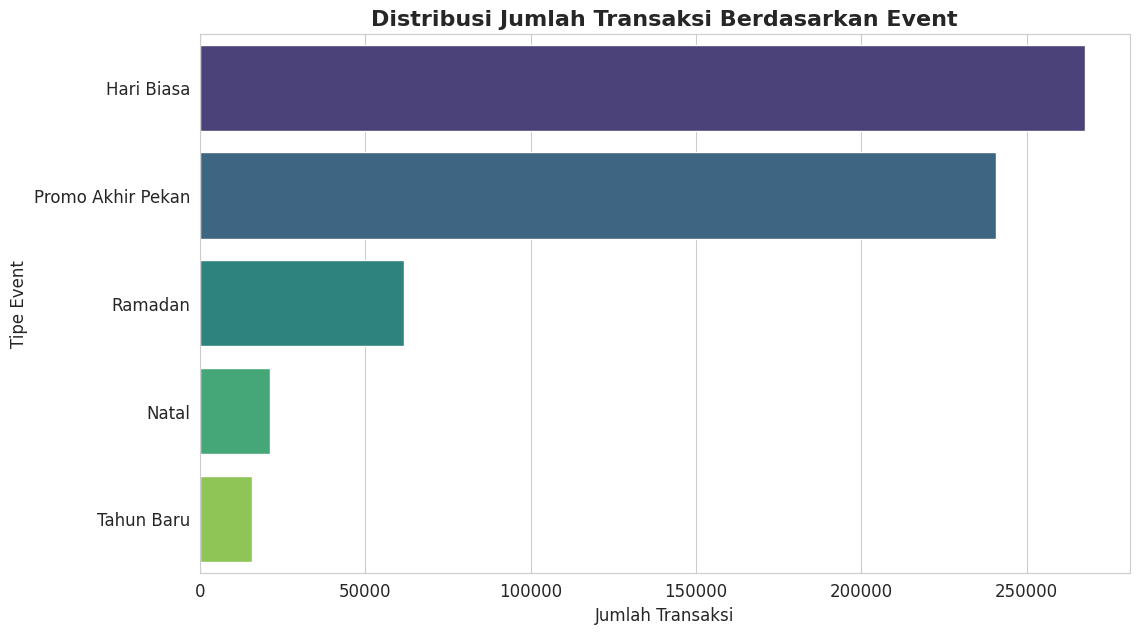


Membuat plot volume transaksi per minggu...


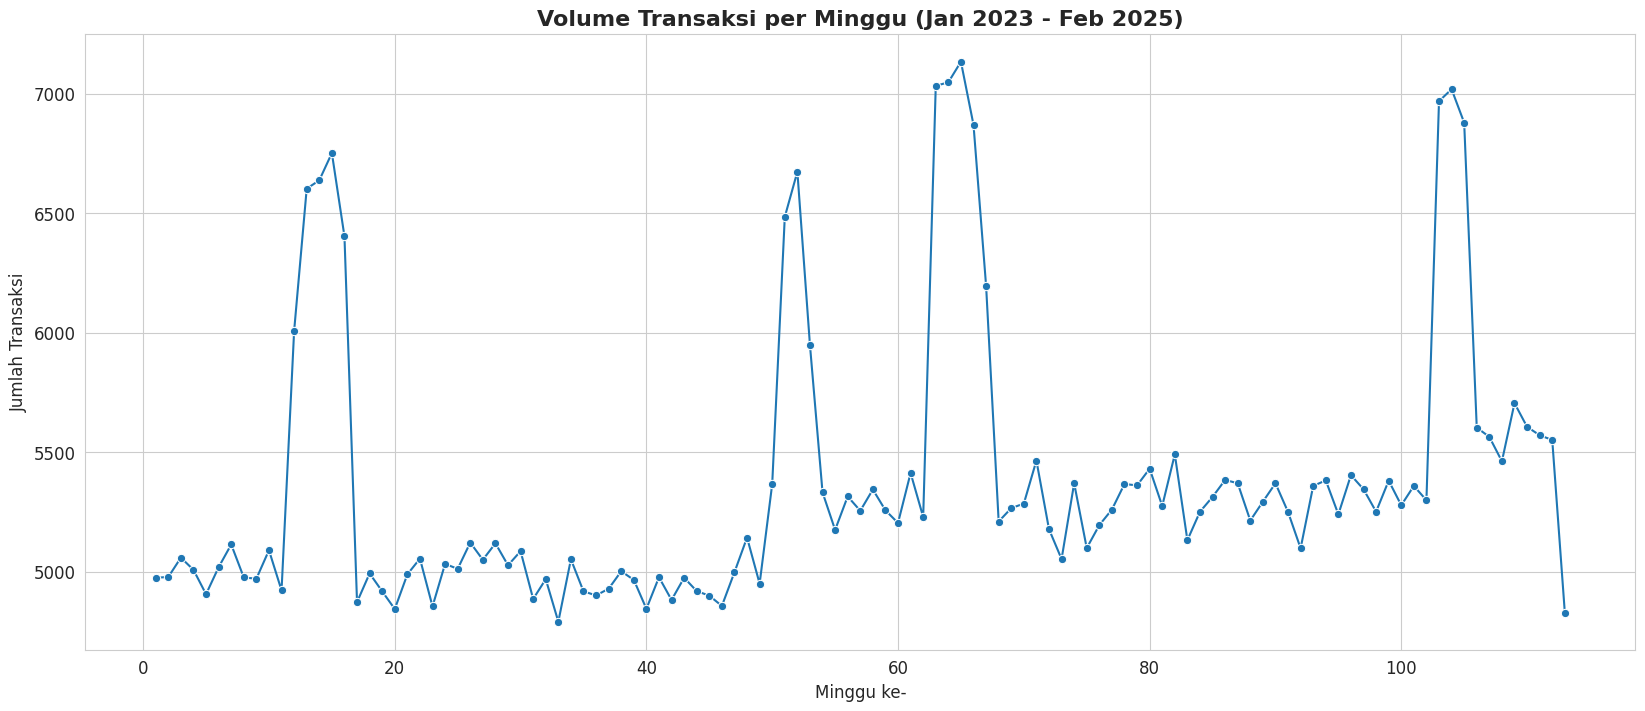

Perhatikan lonjakan pada periode event dan kenaikan volume saat toko baru dibuka (sekitar minggu ke-52).


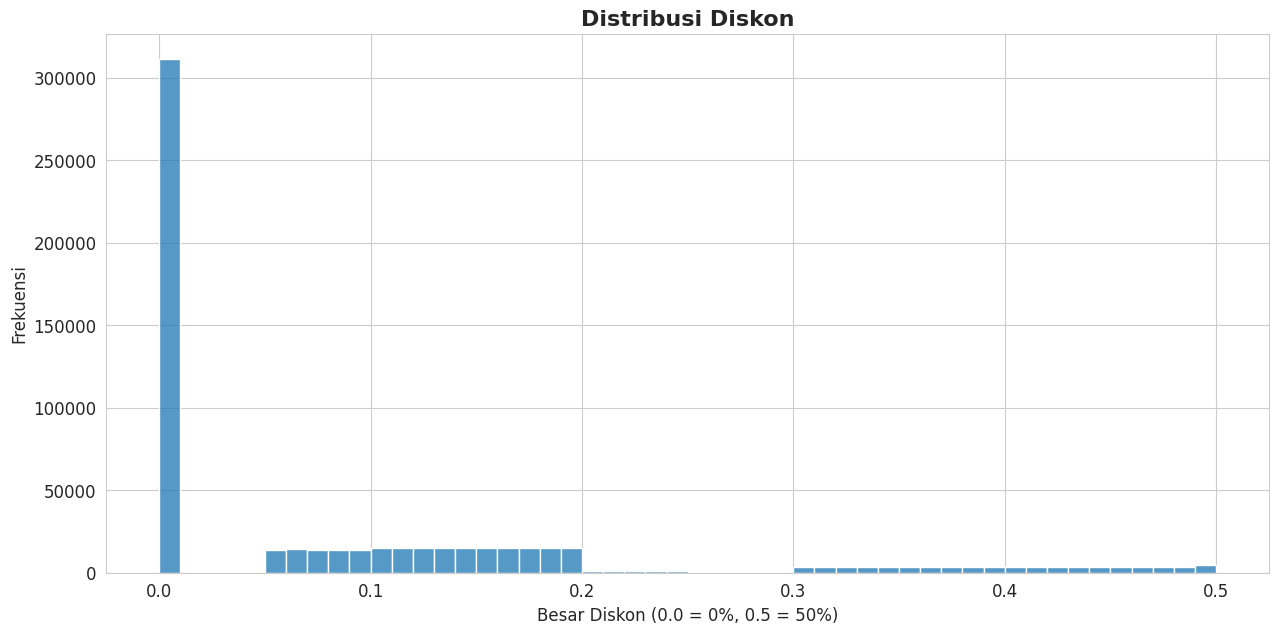

Perhatikan tumpukan besar di angka 0 (tanpa diskon), lalu di rentang 0.05-0.25 (promo), dan 0.3-0.5 (kedaluwarsa).


/tmp/ipython-input-2648642246.py:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




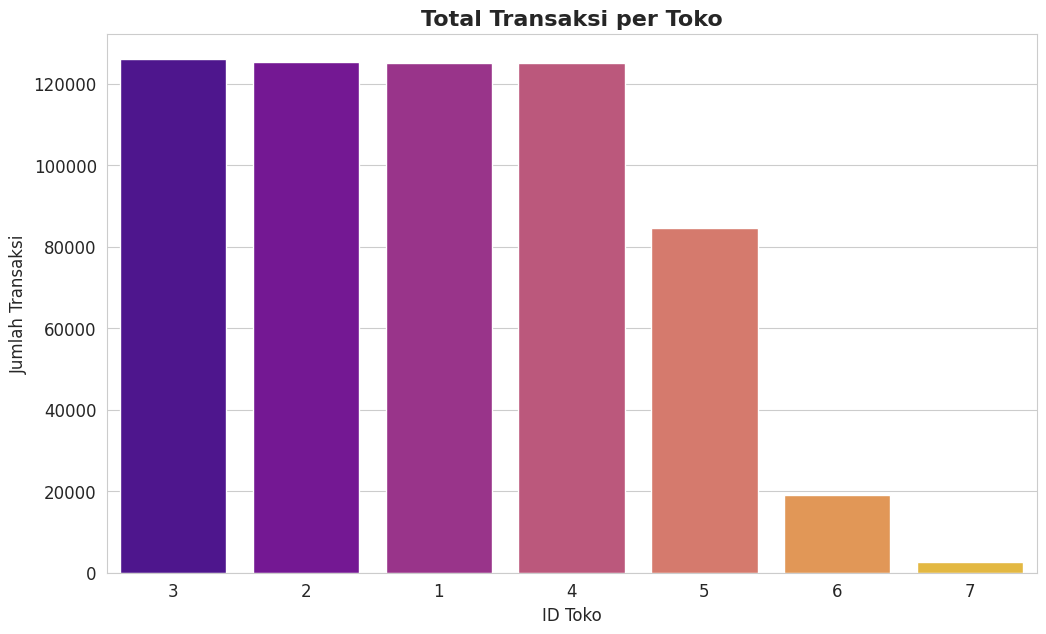

Toko 6 dan 7 memiliki bar yang lebih pendek karena baru buka pada tahun 2024 dan 2025.

Membandingkan RATA-RATA PENJUALAN HARIAN kategori saat Ramadan dan Non-Ramadan...
Jumlah hari dalam periode Ramadan: 63
Jumlah hari dalam periode Non-Ramadan: 727


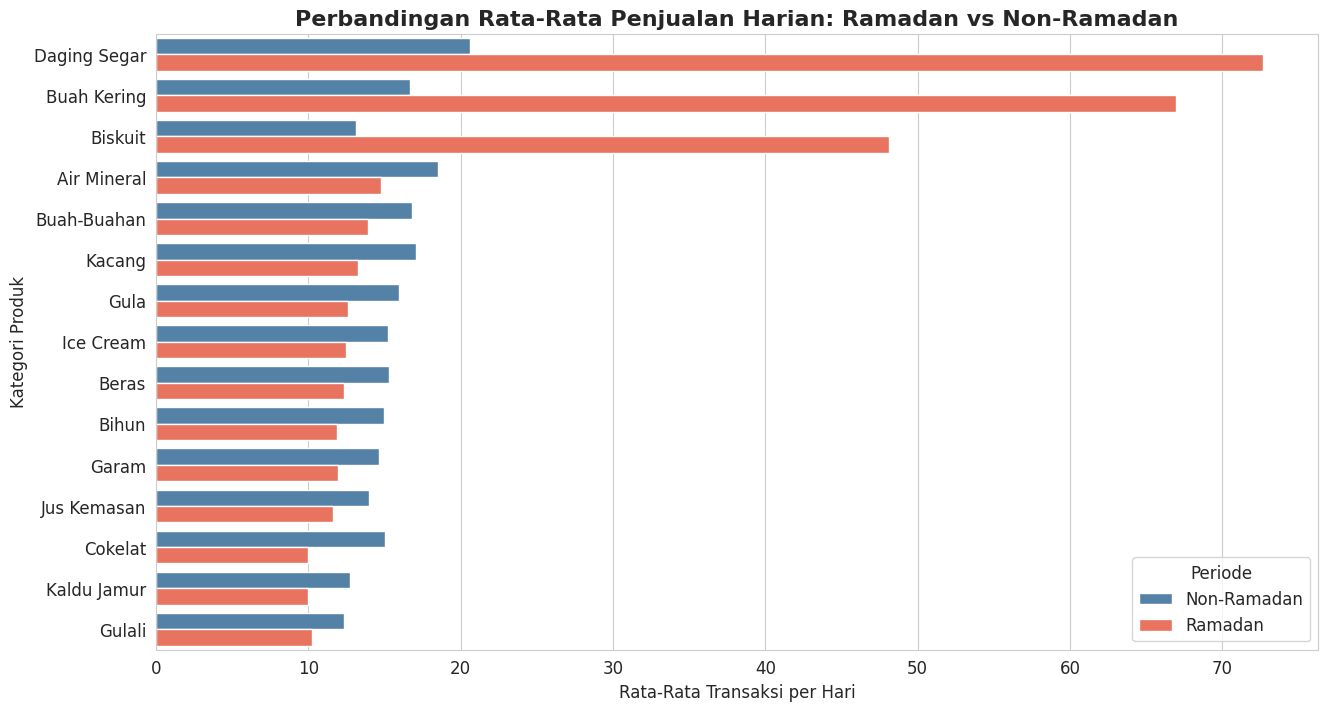


Grafik ini menunjukkan perbandingan yang adil.
Perhatikan bagaimana bar 'Ramadan' untuk 'Sirup' dan 'Biskuit' kini terlihat jauh lebih tinggi,
menandakan lonjakan permintaan harian yang signifikan selama periode tersebut.


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Ubah kolom tanggal ke tipe datetime
df_transaksi['tanggal_transaksi'] = pd.to_datetime(df_transaksi['tanggal_transaksi'])

print(f"Total {len(df_transaksi)} baris data transaksi berhasil digabungkan.")
print("\n--- Ringkasan Data ---")
df_transaksi.info()


# --- Visualisasi untuk Validasi Aturan ---

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 12

# 1. Validasi Distribusi Event (Termasuk 'None')
plt.figure(figsize=(12, 7))
ax = sns.countplot(y=df_transaksi['current_event'], order=df_transaksi['current_event'].fillna('None').value_counts().index, palette='viridis')
ax.set_title('Distribusi Jumlah Transaksi Berdasarkan Event', fontsize=16, fontweight='bold')
ax.set_xlabel('Jumlah Transaksi', fontsize=12)
ax.set_ylabel('Tipe Event', fontsize=12)
plt.show()


# 2. Validasi Volume Transaksi Seiring Waktu
print("\nMembuat plot volume transaksi per minggu...")
transaksi_per_minggu = df_transaksi.groupby('minggu').size().reset_index(name='jumlah_transaksi')
plt.figure(figsize=(20, 8))
sns.lineplot(x='minggu', y='jumlah_transaksi', data=transaksi_per_minggu, marker='o')
plt.title('Volume Transaksi per Minggu (Jan 2023 - Feb 2025)', fontsize=16, fontweight='bold')
plt.xlabel('Minggu ke-', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.show()
print("Perhatikan lonjakan pada periode event dan kenaikan volume saat toko baru dibuka (sekitar minggu ke-52).")


# 3. Validasi Logika Diskon
plt.figure(figsize=(15, 7))
sns.histplot(df_transaksi['diskon'], bins=50, kde=False)
plt.title('Distribusi Diskon', fontsize=16, fontweight='bold')
plt.xlabel('Besar Diskon (0.0 = 0%, 0.5 = 50%)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()
print("Perhatikan tumpukan besar di angka 0 (tanpa diskon), lalu di rentang 0.05-0.25 (promo), dan 0.3-0.5 (kedaluwarsa).")


# 4. Validasi Penjualan per Toko
plt.figure(figsize=(12, 7))
ax = sns.countplot(x=df_transaksi['id_toko'], order=df_transaksi['id_toko'].value_counts().index, palette='plasma')
ax.set_title('Total Transaksi per Toko', fontsize=16, fontweight='bold')
ax.set_xlabel('ID Toko', fontsize=12)
ax.set_ylabel('Jumlah Transaksi', fontsize=12)
plt.show()
print("Toko 6 dan 7 memiliki bar yang lebih pendek karena baru buka pada tahun 2024 dan 2025.")

#  5. Validasi Penjualan Kategori saat Ramadan
print("\nMembandingkan RATA-RATA PENJUALAN HARIAN kategori saat Ramadan dan Non-Ramadan...")


# Gabungkan data transaksi dengan data produk untuk mendapatkan info kategori
df_merged = pd.merge(df_transaksi, produk_df[['id_produk', 'kategori_produk']], on='id_produk', how='left')

# Buat kolom penanda periode Ramadan (True/False)
df_merged['periode'] = df_merged['current_event'].apply(lambda x: 'Ramadan' if x == 'Ramadan' else 'Non-Ramadan')

# Hitung jumlah hari unik untuk setiap periode
hari_unik = df_merged.groupby('periode')['tanggal_transaksi'].nunique()
hari_ramadan = hari_unik.get('Ramadan', 1) # Ambil jumlah hari, default 1 untuk hindari error pembagian nol
hari_non_ramadan = hari_unik.get('Non-Ramadan', 1)

print(f"Jumlah hari dalam periode Ramadan: {hari_ramadan}")
print(f"Jumlah hari dalam periode Non-Ramadan: {hari_non_ramadan}")

# Hitung total transaksi per kategori untuk setiap periode
penjualan_per_periode = df_merged.groupby(['kategori_produk', 'periode']).size().reset_index(name='jumlah_transaksi')

# Hitung RATA-RATA PENJUALAN HARIAN
def hitung_rata_rata_harian(row):
    if row['periode'] == 'Ramadan':
        return row['jumlah_transaksi'] / hari_ramadan
    else:
        return row['jumlah_transaksi'] / hari_non_ramadan

penjualan_per_periode['rata_rata_harian'] = penjualan_per_periode.apply(hitung_rata_rata_harian, axis=1)
penjualan_per_periode = penjualan_per_periode.head(30)
# Membuat visualisasi
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=penjualan_per_periode,
    y='kategori_produk',
    x='rata_rata_harian',
    hue='periode',
    order=penjualan_per_periode.groupby('kategori_produk')['rata_rata_harian'].sum().sort_values(ascending=False).index,
    palette={'Ramadan': '#ff6347', 'Non-Ramadan': '#4682b4'}
)

ax.set_title('Perbandingan Rata-Rata Penjualan Harian: Ramadan vs Non-Ramadan', fontsize=16, fontweight='bold')
ax.set_xlabel('Rata-Rata Transaksi per Hari', fontsize=12)
ax.set_ylabel('Kategori Produk', fontsize=12)
ax.legend(title='Periode')
plt.show()

print("\nGrafik ini menunjukkan perbandingan yang adil.")
print("Perhatikan bagaimana bar 'Ramadan' untuk 'Sirup' dan 'Biskuit' kini terlihat jauh lebih tinggi,")
print("menandakan lonjakan permintaan harian yang signifikan selama periode tersebut.")

## Model Penentu Barang

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from datetime import datetime

In [2]:
# Data
df_produk = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/produk_v4.csv')
df_toko = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/toko.csv')
df_transaksi = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/transaksi_v4.csv')


In [3]:
# 2.1. Konversi Tipe Data & Tentukan Tanggal Referensi
# Untuk konsistensi, kita anggap 'hari ini' adalah satu hari setelah transaksi terakhir di dataset
df_produk['expire_date'] = pd.to_datetime(df_produk['expire_date'])
df_transaksi['tanggal_transaksi'] = pd.to_datetime(df_transaksi['tanggal_transaksi'])
HARI_INI = df_transaksi['tanggal_transaksi'].max() + pd.Timedelta(days=1)
print(f"Tanggal referensi (HARI_INI) ditetapkan pada: {HARI_INI.date()}")

# 2.2. Membuat Fitur Agregat dari Tabel Transaksi
# Kita hitung metrik penjualan untuk setiap produk
print("\nMenghitung fitur agregat dari transaksi...")
agg_transaksi = df_transaksi.groupby('id_produk').agg(
    total_penjualan=('id_produk', 'count'),
    penjualan_terakhir=('tanggal_transaksi', 'max'),
    jumlah_hari_jual=('tanggal_transaksi', 'nunique')
).reset_index()

# Hitung penjualan harian rata-rata
# Tambah 1 untuk menghindari pembagian dengan nol
agg_transaksi['penjualan_harian_avg'] = agg_transaksi['total_penjualan'] / (agg_transaksi['jumlah_hari_jual'] + 1)
agg_transaksi['hari_sejak_penjualan_terakhir'] = (HARI_INI - agg_transaksi['penjualan_terakhir']).dt.days

print("Fitur agregat berhasil dibuat.")
display(agg_transaksi.head())


# 2.3. Membuat Fitur dari Tabel Produk & Menggabungkan Data
print("\nMenggabungkan semua data menjadi satu DataFrame...")
# Mulai dengan df_produk sebagai basis
df_model = df_produk.copy()

# Gabungkan dengan fitur agregat transaksi
df_model = pd.merge(df_model, agg_transaksi[['id_produk', 'penjualan_harian_avg', 'hari_sejak_penjualan_terakhir']], on='id_produk', how='left')

# Isi nilai NaN untuk produk yang mungkin belum pernah terjual
df_model['penjualan_harian_avg'].fillna(0, inplace=True)
# Jika belum pernah terjual, kita anggap sudah sangat lama
df_model['hari_sejak_penjualan_terakhir'].fillna(999, inplace=True)


# Buat fitur utama yang akan kita gunakan
df_model['hari_menuju_kedaluwarsa'] = (df_model['expire_date'] - HARI_INI).dt.days
# Fitur 'margin_headroom' mengukur seberapa banyak ruang yang kita miliki untuk diskon
# Kita asumsikan minimal_margin ada di data produk atau bisa di-join dari tabel kategori
# Untuk contoh ini, kita buat nilai dummy
df_model['minimal_margin'] = df_model['margin'] * 0.4 # Contoh: minimal margin adalah 40% dari margin saat ini
df_model['margin_headroom'] = df_model['margin'] - df_model['minimal_margin']

# Pilih fitur-fitur numerik yang relevan untuk model
fitur_model = [
    'margin',
    'hari_jual_minimal',
    'penjualan_harian_avg',
    'hari_sejak_penjualan_terakhir',
    'hari_menuju_kedaluwarsa',
    'margin_headroom'
]

# Tampilkan hasil akhir dari data yang siap dimodelkan
print("\nData akhir yang siap untuk pemodelan:")
display(df_model[['id_produk', 'nama_produk'] + fitur_model].head())

Tanggal referensi (HARI_INI) ditetapkan pada: 2025-03-01

Menghitung fitur agregat dari transaksi...
Fitur agregat berhasil dibuat.


id_produk  total_penjualan penjualan_terakhir  jumlah_hari_jual  \
0  P00000001               19         2024-10-25                19   
1  P00000002               20         2025-01-29                20   
2  P00000003               14         2025-02-25                14   
3  P00000004               19         2025-02-06                19   
4  P00000005               26         2025-01-13                26   

   penjualan_harian_avg  hari_sejak_penjualan_terakhir  
0              0.950000                            127  
1              0.952381                             31  
2              0.933333                              4  
3              0.950000                             23  
4              0.962963                             47


Menggabungkan semua data menjadi satu DataFrame...

Data akhir yang siap untuk pemodelan:


/tmp/ipython-input-3387686918.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['penjualan_harian_avg'].fillna(0, inplace=True)
/tmp/ipython-input-3387686918.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

id_produk                                   nama_produk  margin  \
0  P00000001                 JayaMakmur Garam Varian C 50g  0.1845   
1  P00000002           IndoAgro Sarden Kaleng Spesial 500g  0.1935   
2  P00000003  SentosaNusantara Kopi Kemasan Varian A 750ml  0.2955   
3  P00000004             NusantaraPT Makaroni Spesial 200g  0.2411   
4  P00000005                 IndoJaya Yogurt Spesial 750ml  0.2222   

   hari_jual_minimal  penjualan_harian_avg  hari_sejak_penjualan_terakhir  \
0                 19              0.950000                          127.0   
1                 29              0.952381                           31.0   
2                 25              0.933333                            4.0   
3                 26              0.950000                           23.0   
4                 30              0.962963                           47.0   

   hari_menuju_kedaluwarsa  margin_headroom  
0                      552          0.11070  
1                      469          0.11610  
2                      562          0.17730  
3                      439          0.14466  
4                      408          0.13332

In [4]:
# ==============================================================================
# LANGKAH 3 (REVISI BESAR): Membuat Label Skor Urgensi Kontinu
# ==============================================================================
print("Membuat label 'urgency_score' yang lebih bernuansa...")

# Tentukan bobot bisnis (bisa disesuaikan)
W_KEDALUWARSA = 0.6  # Paling penting
W_KELAMBATAN = 0.3  # Cukup penting
W_PENJUALAN = 0.1   # Sebagai penalti

# Hindari pembagian dengan nol atau nilai negatif untuk hari menuju kedaluwarsa
# Kita batasi nilai minimumnya menjadi 1
df_model['hari_menuju_kedaluwarsa_safe'] = df_model['hari_menuju_kedaluwarsa'].clip(lower=1)

# Hitung komponen skor
# Skor kedaluwarsa (semakin kecil harinya, semakin besar skornya, non-linear)
df_model['skor_kedaluwarsa'] = 1 / df_model['hari_menuju_kedaluwarsa_safe']

# Skor kelambatan (semakin lama tidak laku, semakin tinggi skornya)
df_model['skor_kelambatan'] = df_model['hari_sejak_penjualan_terakhir']

# Skor penalti penjualan (semakin laku, semakin tinggi penaltinya)
df_model['skor_penalti_penjualan'] = df_model['penjualan_harian_avg']

# Gabungkan menjadi skor urgensi mentah
df_model['urgency_score_raw'] = (W_KEDALUWARSA * df_model['skor_kedaluwarsa'] +
                                 W_KELAMBATAN * df_model['skor_kelambatan'] -
                                 W_PENJUALAN * df_model['skor_penalti_penjualan'])

# Normalisasi skor mentah ke rentang 0-100 agar lebih mudah diinterpretasikan
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))
df_model['urgency_score'] = scaler.fit_transform(df_model[['urgency_score_raw']])

print("Distribusi 'urgency_score' yang baru:")
print(df_model['urgency_score'].describe())


# ==============================================================================
# LANGKAH 4 & 5 (REVISI BESAR): Melatih Model Regresi untuk Memprediksi Skor
# ==============================================================================
# Karena target kita sekarang kontinu, kita gunakan LGBMRegressor.
# Tujuannya adalah melatih model yang bisa memprediksi 'urgency_score' untuk produk baru
# atau saat data diperbarui.

# Definisikan fitur (X) dan target (y) BARU kita
X = df_model[fitur_model]  # Fitur tetap sama
y = df_model['urgency_score']   # Target sekarang adalah skor kontinu

# Bagi data menjadi set training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData dibagi menjadi {len(X_train)} baris training dan {len(X_test)} baris testing.")

# Inisialisasi model REGRESI
regressor = lgb.LGBMRegressor(
    objective='regression_l1',  # L1 (MAE) loss, lebih tahan terhadap outlier
    metric='mae',
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1,
    num_leaves=31
)

print("\nMemulai pelatihan model LGBMRegressor...")
regressor.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='mae',
    callbacks=[lgb.early_stopping(20, verbose=False)]
)
print("Pelatihan model regresi selesai.")

# ==============================================================================
# LANGKAH 6 (REVISI BESAR): Membuat Peringkat Berdasarkan Prediksi Skor
# ==============================================================================
print("\nMemprediksi skor urgensi untuk semua produk...")

# Gunakan model regresi untuk memprediksi skor pada keseluruhan dataset
df_model['skor_prediksi'] = regressor.predict(X)

# Buat DataFrame hasil
df_hasil_peringkat_baru = df_model[[
    'id_produk', 'nama_produk', 'kategori_produk', 'skor_prediksi',
    'hari_menuju_kedaluwarsa', 'hari_sejak_penjualan_terakhir'
]].copy()

# Urutkan berdasarkan SKOR PREDIKSI dari yang tertinggi ke terendah
df_hasil_peringkat_baru = df_hasil_peringkat_baru.sort_values(by='skor_prediksi', ascending=False)

print("\n\n--- HASIL AKHIR (VERSI BARU): TOP 20 PRODUK KANDIDAT UNTUK DISKON ---")
display(df_hasil_peringkat_baru.head(20))

print("\nContoh sebaran skor prediksi yang unik:")
print(np.unique(df_hasil_peringkat_baru['skor_prediksi'].round(2)))

Membuat label 'urgency_score' yang lebih bernuansa...
Distribusi 'urgency_score' yang baru:
count    87506.000000
mean        30.025333
std         39.210563
min          0.000000
25%          3.312699
50%          8.830344
75%         35.278378
max        100.000000
Name: urgency_score, dtype: float64

Data dibagi menjadi 70004 baris training dan 17502 baris testing.

Memulai pelatihan model LGBMRegressor...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 70004, number of used features: 6
[LightGBM] [Info] Start training from score 8.824883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

id_produk                             nama_produk kategori_produk  \
87492  P00087493        PTAgro Buah-Buahan Varian C 200g     Buah-Buahan   
55494  P00055495  AbadiAbadi Seafood Segar Varian B 750g   Seafood Segar   
74435  P00074436   AbadiMakmur Buah-Buahan Varian A 200g     Buah-Buahan   
83370  P00083371      AgroPT Seafood Segar Varian C 200g   Seafood Segar   
74458  P00074459   CVNusantara Buah-Buahan Varian C 250g     Buah-Buahan   
74470  P00074471    SentosaCV Daging Segar Varian C 200g    Daging Segar   
59369  P00059370       PTJaya Sayur-Sayuran Spesial 500g   Sayur-Sayuran   
59361  P00059362           AbadiAbadi Roti Varian B 100g            Roti   
74512  P00074513       CVJaya Seafood Segar Spesial 750g   Seafood Segar   
55572  P00055573  SentosaMakmur Buah-Buahan Spesial 100g     Buah-Buahan   
80104  P00080105        AgroIndo Buah-Buahan Ekstra 100g     Buah-Buahan   
80101  P00080102    MakmurPT Seafood Segar Varian A 750g   Seafood Segar   
80128  P00080129            MakmurIndo Roti Spesial 100g            Roti   
80150  P00080151  MakmurJaya Sayur-Sayuran Varian C 500g   Sayur-Sayuran   
65968  P00065969   JayaPangan Seafood Segar Varian C 50g   Seafood Segar   
87429  P00087430       PTMakmur Buah-Buahan Spesial 500g     Buah-Buahan   
87427  P00087428         PTPT Daging Segar Varian C 200g    Daging Segar   
74408  P00074409   JayaMakmur Sayur-Sayuran Ekstra 1000g   Sayur-Sayuran   
54287  P00054288       IndoAgro Daging Segar Ekstra 100g    Daging Segar   
74444  P00074445      PanganCV Buah-Buahan Varian C 750g     Buah-Buahan   

       skor_prediksi  hari_menuju_kedaluwarsa  hari_sejak_penjualan_terakhir  
87492      99.999852                      178                          999.0  
55494      99.999852                      182                          999.0  
74435      99.999852                      178                          999.0  
83370      99.999852                      188                          999.0  
74458      99.999852                      181                          999.0  
74470      99.999852                      191                          999.0  
59369      99.999852                      179                          999.0  
59361      99.999852                      194                          999.0  
74512      99.999852                      180                          999.0  
55572      99.999852                      193                          999.0  
80104      99.999852                      178                          999.0  
80101      99.999852                      181                          999.0  
80128      99.999852                      175                          999.0  
80150      99.999852                      195                          999.0  
65968      99.999852                      180                          999.0  
87429      99.999852                      173                          999.0  
87427      99.999852                      173                          999.0  
74408      99.999852                      186                          999.0  
54287      99.999852                      180                          999.0  
74444      99.999852                      193                          999.0


Contoh sebaran skor prediksi yang unik:
[1.000e-02 2.000e-02 1.000e-01 ... 5.807e+01 5.810e+01 1.000e+02]


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Import numpy

# Asumsikan df_hasil_peringkat_baru sudah berisi skor prediksi

# --- LANGKAH 1: Tentukan Parameter ---
TOTAL_SLOT_PROMOSI = 1000
SKOR_THRESHOLD = 50 # Angka ini bisa disesuaikan

# --- LANGKAH 2: Hitung Kandidat per Kategori ---
# Tandai produk mana yang dianggap 'kandidat kuat'
df_hasil_peringkat_baru['is_candidate'] = df_hasil_peringkat_baru['skor_prediksi'] > SKOR_THRESHOLD

# Hitung jumlah kandidat per kategori
candidate_counts = df_hasil_peringkat_baru[df_hasil_peringkat_baru['is_candidate']].groupby('kategori_produk').size()
total_candidates = candidate_counts.sum()

print("Jumlah kandidat kuat (skor > 50) per kategori:")
print(candidate_counts)

# --- LANGKAH 3: Hitung dan Alokasikan Kuota Dinamis ---
# Hitung kuota mentah berdasarkan proporsi
raw_quotas = (candidate_counts / total_candidates) * TOTAL_SLOT_PROMOSI

# Bulatkan kuota dan pastikan jumlahnya tepat 30 (logika pembulatan sederhana)
# Kita bulatkan ke bawah, lalu sisa slotnya kita berikan satu per satu ke kategori dengan desimal terbesar
quotas = np.floor(raw_quotas).astype(int) # Menggunakan np.floor()
sisa_slot = TOTAL_SLOT_PROMOSI - quotas.sum()

# Berikan sisa slot ke kategori dengan sisa desimal terbesar
sisa_desimal = raw_quotas - quotas
# Sort sisa desimal dari terbesar ke terkecil dan ambil indexnya
top_sisa_cats = sisa_desimal.sort_values(ascending=False).index.tolist()

# Alokasikan sisa slot
for cat in top_sisa_cats:
    if sisa_slot <= 0:
        break
    quotas[cat] += 1
    sisa_slot -= 1

# Pastikan setiap kategori yang punya kandidat dapat minimal 1 slot (opsional, tergantung aturan bisnis)
# Jika ada kategori dengan kandidat tapi kuota 0, alokasikan 1 (ambil dari kuota terbesar jika perlu)
# Untuk saat ini, kita biarkan bisa 0 jika proporsinya sangat kecil

print("\nKuota Dinamis yang Dialokasikan:")
print(quotas)

# --- LANGKAH 4: Ambil Produk Berdasarkan Kuota Dinamis ---
list_of_dfs = []
for category, num_to_take in quotas.items():
    if num_to_take > 0: # Hanya ambil jika kuotanya lebih dari 0
        # Ambil 'num_to_take' produk teratas dari kategori tersebut
        top_products_per_cat = (
            df_hasil_peringkat_baru[df_hasil_peringkat_baru['kategori_produk'] == category]
            .sort_values(by='skor_prediksi', ascending=False) # Pastikan diurutkan berdasarkan skor prediksi
            .head(num_to_take)
        )
        list_of_dfs.append(top_products_per_cat)

# Gabungkan semua hasilnya menjadi satu DataFrame
if list_of_dfs: # Cek apakah list tidak kosong sebelum concat
    df_final_dinamis = pd.concat(list_of_dfs)
else:
    df_final_dinamis = pd.DataFrame() # Buat DataFrame kosong jika tidak ada produk yang dipilih


# Urutkan hasil akhir berdasarkan skor
df_final_dinamis = df_final_dinamis.sort_values(by='skor_prediksi', ascending=False)

print(f"\n--- DAFTAR FINAL {len(df_final_dinamis)} PRODUK DENGAN KUOTA DINAMIS ---")
display(df_final_dinamis)

Jumlah kandidat kuat (skor > 50) per kategori:
kategori_produk
Air Mineral         539
Beras               441
Bihun               415
Biskuit             292
Buah Kering         432
Buah-Buahan         463
Cokelat             323
Daging Segar        453
Garam               412
Gula                468
Gulali              346
Ice Cream           446
Jus Kemasan         409
Kacang              417
Kaldu Jamur         355
Kecap               397
Keju                445
Kentang Goreng      443
Keripik             414
Kopi Bubuk          447
Kopi Kemasan        435
Kornet              421
Krim                324
Kuaci               345
Makaroni            470
Marshmallow         434
Mayones             434
Mentega             375
Mie Instan          445
Minuman Isotonik    428
Minyak Goreng       431
Nugget              474
Pasta               429
Penyedap Rasa       373
Permen              480
Roti                326
Saos                498
Sarden Kaleng       363
Sayur-Sayuran       482
S

id_produk                            nama_produk kategori_produk  \
59361  P00059362          AbadiAbadi Roti Varian B 100g            Roti   
80128  P00080129           MakmurIndo Roti Spesial 100g            Roti   
66236  P00066237        NusantaraPangan Roti Ekstra 50g            Roti   
66232  P00066233       IndoNusantara Roti Varian C 100g            Roti   
65774  P00065775            CVPangan Roti Varian C 500g            Roti   
...          ...                                    ...             ...   
77673  P00077674           CVAbadi Soda Varian C 1500ml            Soda   
86628  P00086629  PanganMakmur Mie Instan Spesial 1000g      Mie Instan   
75083  P00075084  AbadiSentosa Mie Instan Varian A 500g      Mie Instan   
86343  P00086344     PanganAgro Mie Instan Spesial 100g      Mie Instan   
80530  P00080531     AgroMakmur Mie Instan Varian C 50g      Mie Instan   

       skor_prediksi  hari_menuju_kedaluwarsa  hari_sejak_penjualan_terakhir  \
59361      99.999852                      194                          999.0   
80128      99.999852                      175                          999.0   
66236      99.999852                      184                          999.0   
66232      99.999852                      177                          999.0   
65774      99.999852                      188                          999.0   
...              ...                      ...                            ...   
77673      99.999359                      374                          999.0   
86628      99.999359                      374                          999.0   
75083      99.999359                      374                          999.0   
86343      99.999359                      375                          999.0   
80530      99.999359                      376                          999.0   

       is_candidate  
59361          True  
80128          True  
66236          True  
66232          True  
65774          True  
...             ...  
77673          True  
86628          True  
75083          True  
86343          True  
80530          True  

[1000 rows x 7 columns]

## Model Penentu Diskon

In [6]:
# Muat semua data yang dibutuhkan
df_transaksi = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/transaksi_v4.csv')
df_produk = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/produk_v4.csv')
df_toko = pd.read_csv('https://raw.githubusercontent.com/AzrilFahmiardi/bizzit-compfest-2025/refs/heads/master/data/toko.csv')
df_top_30_rekomendasi = df_final_dinamis.copy()

In [7]:
import pandas as pd
import numpy as np

print("--- Langkah 1: Membuat df_master_train (Menggabungkan data historis) ---")

# Menyeragamkan tipe data kunci untuk memastikan merge berhasil
df_transaksi['id_produk'] = df_transaksi['id_produk'].astype(str)
df_produk['id_produk'] = df_produk['id_produk'].astype(str)
df_toko['id_toko'] = df_toko['id_toko'].astype(int)
df_transaksi['id_toko'] = df_transaksi['id_toko'].astype(int)

# Gabungkan transaksi dengan data produk (menghapus kolom duplikat `id_toko` dari produk)
print("   - Menggabungkan transaksi dengan produk...")
if 'id_toko' in df_produk.columns:
    df_produk_cleaned = df_produk.drop(columns=['id_toko'])
else:
    df_produk_cleaned = df_produk
df_master_train = pd.merge(df_transaksi, df_produk_cleaned, on='id_produk', how='left')

# Gabungkan dengan data toko
print("   - Menggabungkan dengan data toko...")
df_master_train = pd.merge(df_master_train, df_toko, on='id_toko', how='left')

print("\n'df_master_train' (buku pelajaran untuk model) berhasil dibuat!")
print("Shape:", df_master_train.shape)
display(df_master_train.head())

--- Langkah 1: Membuat df_master_train (Menggabungkan data historis) ---
   - Menggabungkan transaksi dengan produk...
   - Menggabungkan dengan data toko...

'df_master_train' (buku pelajaran untuk model) berhasil dibuat!
Shape: (607561, 38)


id_produk  minggu tanggal_transaksi      current_event  id_toko  \
0  P00006032       1        2023-01-01  Promo Akhir Pekan        1   
1  P00001069       1        2023-01-01  Promo Akhir Pekan        1   
2  P00001268       1        2023-01-01  Promo Akhir Pekan        1   
3  P00005220       1        2023-01-01  Promo Akhir Pekan        1   
4  P00004992       1        2023-01-01  Promo Akhir Pekan        1   

   harga_promosi  diskon               tipe_diskon  margin_promosi  hari_jual  \
0          17100  0.1115  Generic Product Discount          0.0382        171   
1           5743  0.1592  Generic Product Discount          0.0350        118   
2          16400  0.0744  Generic Product Discount          0.1013         78   
3          12800  0.1852  Generic Product Discount          0.0353         15   
4          16700  0.1132  Generic Product Discount          0.0354        100   

   ...  jumlah_karyawan        tipe  \
0  ...                4  permukiman   
1  ...                4  permukiman   
2  ...                4  permukiman   
3  ...                4  permukiman   
4  ...                4  permukiman   

                                       umur_konsumen  \
0  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   
1  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   
2  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   
3  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   
4  gen_alpha: 0.10, gen_z: 0.30, gen_y: 0.35, gen...   

             jenis_kelamin_konsumen  \
0  perempuan: 0.60, laki-laki: 0.40   
1  perempuan: 0.60, laki-laki: 0.40   
2  perempuan: 0.60, laki-laki: 0.40   
3  perempuan: 0.60, laki-laki: 0.40   
4  perempuan: 0.60, laki-laki: 0.40   

                       penghasilan_konsumen_avg  \
0  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   
1  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   
2  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   
3  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   
4  terbatas: 0.25, menengah: 0.60, tinggi: 0.15   

                                  pekerjaan_konsumen  \
0  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   
1  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   
2  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   
3  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   
4  pelajar_mahasiswa: 0.25, pekerja_kantoran: 0.4...   

                kebiasaan_konsumen  \
0  impulsif: 0.40, terencana: 0.60   
1  impulsif: 0.40, terencana: 0.60   
2  impulsif: 0.40, terencana: 0.60   
3  impulsif: 0.40, terencana: 0.60   
4  impulsif: 0.40, terencana: 0.60   

                                        reaksi_promo  \
0  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
1  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
2  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
3  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   
4  pemburu_promo: 0.35, oportunis: 0.45, loyal: 0.20   

                          frekuensi_pembelian  \
0  sering: 0.40, sesekali: 0.50, jarang: 0.10   
1  sering: 0.40, sesekali: 0.50, jarang: 0.10   
2  sering: 0.40, sesekali: 0.50, jarang: 0.10   
3  sering: 0.40, sesekali: 0.50, jarang: 0.10   
4  sering: 0.40, sesekali: 0.50, jarang: 0.10   

                                    waktu_pembelian  
0  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  
1  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  
2  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  
3  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  
4  pagi: 0.25, siang: 0.25, sore: 0.35, malam: 0.15  

[5 rows x 38 columns]

In [8]:
print("\n--- Langkah 2: Mendefinisikan 'outcome' (profit_transaksi) ---")

df_master_train['profit_transaksi'] = df_master_train['harga_promosi'] - df_master_train['harga_beli']

print("Kolom 'profit_transaksi' berhasil dibuat di df_master_train.")


--- Langkah 2: Mendefinisikan 'outcome' (profit_transaksi) ---
Kolom 'profit_transaksi' berhasil dibuat di df_master_train.


In [9]:
print("\n--- Langkah 3: Feature Engineering pada Data Latihan ---")

# 3a. Parsing Fitur Konteks Toko
print("   - Mengekstrak fitur dari kolom Toko...")
try:
    df_master_train['rasio_pekerja_kantoran'] = df_master_train['pekerjaan_konsumen'].str.extract(r'pekerja_kantoran: (\d+\.\d+)').astype(float).fillna(0)
    df_master_train['rasio_impulsif'] = df_master_train['kebiasaan_konsumen'].str.extract(r'impulsif: (\d+\.\d+)').astype(float).fillna(0)
except Exception as e:
    print(f"   - Peringatan: Gagal mengekstrak fitur toko. Error: {e}")

# 3b. Membuat Fitur Baru dari Detail Produk
print("   - Membuat fitur 'gramasi' dan 'harga_per_gram'...")
df_master_train['gramasi'] = df_master_train['nama_produk'].str.extract(r'(\d+)\s?(g|ml)')[0].astype(float).fillna(0)
df_master_train['harga_per_gram'] = (df_master_train['harga_jual'] / df_master_train['gramasi']).replace([np.inf, -np.inf], 0).fillna(0)

# 3c. One-Hot Encoding Fitur Kategorikal
print("   - Melakukan One-Hot Encoding...")
df_master_train_featured = pd.get_dummies(df_master_train, columns=['brand', 'kategori_produk', 'current_event'], prefix=['brand', 'kat', 'event'])

print("Feature engineering pada data latihan selesai.")


--- Langkah 3: Feature Engineering pada Data Latihan ---
   - Mengekstrak fitur dari kolom Toko...
   - Membuat fitur 'gramasi' dan 'harga_per_gram'...
   - Melakukan One-Hot Encoding...
Feature engineering pada data latihan selesai.


In [10]:
print("\n--- Langkah 4: Finalisasi dan Pemisahan Data Latihan ---")

# Definisikan semua nama kolom yang akan menjadi fitur (X)
fitur_numerik = [
    'harga_jual', 'margin', 'hari_jual', 'kedaluwarsa',
    'rasio_pekerja_kantoran', 'rasio_impulsif', 'gramasi', 'harga_per_gram'
]
fitur_ohe = [col for col in df_master_train_featured.columns if col.startswith(('brand_', 'kat_', 'event_'))]
feature_columns = fitur_numerik + fitur_ohe
print(f"   - Total {len(feature_columns)} fitur akan digunakan.")

# Pisahkan data menjadi beberapa bagian berdasarkan 'tipe_diskon'
dataframes_per_treatment = {}
for treatment_name in df_master_train_featured['tipe_diskon'].unique():
    dataframes_per_treatment[treatment_name] = df_master_train_featured[df_master_train_featured['tipe_diskon'] == treatment_name].copy()

print("\nData latihan telah dipisahkan per tipe diskon:")
for name, df in dataframes_per_treatment.items():
    print(f"- {name}: {len(df)} baris")


--- Langkah 4: Finalisasi dan Pemisahan Data Latihan ---
   - Total 162 fitur akan digunakan.

Data latihan telah dipisahkan per tipe diskon:
- Generic Product Discount: 198079 baris
- Expired Discount: 69952 baris
- BOGO: 887 baris
- Tanpa Diskon: 247805 baris
- Discount Perkenalan: 4889 baris
- Event Based Discount: 85949 baris


In [11]:
import lightgbm as lgb
print("\n--- Langkah 5: Melatih Model-model T-Learner ---")
trained_models = {}
for treatment_name, df_treatment in dataframes_per_treatment.items():
    print(f"--> Melatih model untuk: '{treatment_name}'")

    if len(df_treatment) < 100:
        print(f"    - Peringatan: Data terlalu sedikit, model untuk '{treatment_name}' dilewati.")
        continue

    X_train = df_treatment[feature_columns]
    y_train = df_treatment['profit_transaksi']

    model = lgb.LGBMRegressor(random_state=42, n_estimators=100, verbose=-1)
    model.fit(X_train, y_train)

    trained_models[treatment_name] = model
    print(f"    - Model untuk '{treatment_name}' berhasil dilatih.")

print("\n=================================================")
print("  PROSES PELATIHAN MODEL SPESIALIS SELESAI  ")
print("=================================================")


--- Langkah 5: Melatih Model-model T-Learner ---
--> Melatih model untuk: 'Generic Product Discount'
    - Model untuk 'Generic Product Discount' berhasil dilatih.
--> Melatih model untuk: 'Expired Discount'
    - Model untuk 'Expired Discount' berhasil dilatih.
--> Melatih model untuk: 'BOGO'
    - Model untuk 'BOGO' berhasil dilatih.
--> Melatih model untuk: 'Tanpa Diskon'
    - Model untuk 'Tanpa Diskon' berhasil dilatih.
--> Melatih model untuk: 'Discount Perkenalan'
    - Model untuk 'Discount Perkenalan' berhasil dilatih.
--> Melatih model untuk: 'Event Based Discount'
    - Model untuk 'Event Based Discount' berhasil dilatih.

  PROSES PELATIHAN MODEL SPESIALIS SELESAI  


In [12]:
print("--- Langkah 6: Menyiapkan Data untuk Diberi Rekomendasi (Versi Perbaikan) ---")

# Ambil daftar ID produk dari hasil Model 1
list_id_rekomendasi = df_top_30_rekomendasi['id_produk'].astype(str).unique().tolist()

# Mulai dengan DataFrame yang berisi produk-produk ini beserta detailnya dari df_produk
df_rekomendasi = df_produk[df_produk['id_produk'].isin(list_id_rekomendasi)].copy()

# Gabungkan dengan data toko
df_rekomendasi = pd.merge(df_rekomendasi, df_toko, on='id_toko', how='left')

print(f"   - Menyiapkan data untuk {len(df_rekomendasi)} kombinasi produk-toko...")

# ============================ SOLUSI DI SINI ============================
# [SOLUSI] Tambahkan kolom 'current_event' secara manual untuk simulasi.
# Kita asumsikan promosi akan dijalankan pada konteks 'Promo Akhir Pekan'.
df_rekomendasi['current_event'] = 'Promo Akhir Pekan'
print("   - Kolom 'current_event' ditambahkan dengan nilai 'Promo Akhir Pekan'.")
# =======================================================================


# Lakukan feature engineering yang SAMA PERSIS dengan Langkah 3
print("   - Menerapkan feature engineering...")

# 6a. Parsing Fitur Konteks Toko
try:
    df_rekomendasi['rasio_pekerja_kantoran'] = df_rekomendasi['pekerjaan_konsumen'].str.extract(r'pekerja_kantoran: (\d+\.\d+)').astype(float).fillna(0)
    df_rekomendasi['rasio_impulsif'] = df_rekomendasi['kebiasaan_konsumen'].str.extract(r'impulsif: (\d+\.\d+)').astype(float).fillna(0)
except Exception: pass

# 6b. Membuat Fitur Baru dari Detail Produk
df_rekomendasi['gramasi'] = df_rekomendasi['nama_produk'].str.extract(r'(\d+)\s?(g|ml)')[0].astype(float).fillna(0)
df_rekomendasi['harga_per_gram'] = (df_rekomendasi['harga_jual'] / df_rekomendasi['gramasi']).replace([np.inf, -np.inf], 0).fillna(0)
df_rekomendasi['hari_jual'] = df_rekomendasi['hari_jual_minimal']
df_rekomendasi['kedaluwarsa'] = 365 - df_rekomendasi['hari_jual_minimal']


# 6c. One-Hot Encoding (Sekarang akan berhasil)
df_rekomendasi_featured = pd.get_dummies(df_rekomendasi, columns=['brand', 'kategori_produk', 'current_event'], prefix=['brand', 'kat', 'event'])

# 6d. Finalisasi - Pastikan semua kolom ada dan urutannya sama
for col in feature_columns:
    if col not in df_rekomendasi_featured.columns:
        df_rekomendasi_featured[col] = 0
X_rekomendasi = df_rekomendasi_featured[feature_columns]

print("Data rekomendasi siap untuk diprediksi.")

--- Langkah 6: Menyiapkan Data untuk Diberi Rekomendasi (Versi Perbaikan) ---
   - Menyiapkan data untuk 1000 kombinasi produk-toko...
   - Kolom 'current_event' ditambahkan dengan nilai 'Promo Akhir Pekan'.
   - Menerapkan feature engineering...
Data rekomendasi siap untuk diprediksi.


In [13]:
print("\n--- Langkah 7: Simulasi, Perhitungan Uplift, dan Rekomendasi Final (Versi Perbaikan) ---")

# ==============================================================================
# Tahap 1 & 2 (Tidak berubah)
# ==============================================================================
print("   - Tahap 1 & 2: Menyiapkan data dan melakukan prediksi...")
# (Kode dari langkah 6 untuk menyiapkan X_rekomendasi diasumsikan sudah berjalan)

hasil_prediksi = {}
for treatment_name, model in trained_models.items():
    prediksi = model.predict(X_rekomendasi)
    hasil_prediksi[treatment_name] = prediksi

df_prediksi_profit = pd.DataFrame(hasil_prediksi, index=df_rekomendasi.index)


# ==============================================================================
# Tahap 3: Hitung Uplift dan Tentukan Strategi Terbaik (Logika Diperbaiki)
# ==============================================================================
print("   - Tahap 3: Menghitung uplift dan memilih strategi terbaik...")

if 'Tanpa Diskon' in df_prediksi_profit.columns:
    baseline_profit = df_prediksi_profit['Tanpa Diskon']
    # df_uplift_numeric hanya berisi kolom-kolom uplift yang berupa angka
    df_uplift_numeric = df_prediksi_profit.drop(columns=['Tanpa Diskon'], errors='ignore').subtract(baseline_profit, axis=0)
else:
    print("   - Peringatan: Model 'Tanpa Diskon' tidak ditemukan.")
    df_uplift_numeric = df_prediksi_profit
    baseline_profit = 0

# [DIUBAH] Buat DataFrame hasil untuk menampung rekomendasi
df_hasil_rekomendasi = pd.DataFrame(index=df_uplift_numeric.index)

# [DIUBAH] 1. Cari nama strategi terbaik DULU (dari DataFrame angka)
df_hasil_rekomendasi['rekomendasi_strategi'] = df_uplift_numeric.idxmax(axis=1)

# [DIUBAH] 2. BARU ambil nilai uplift tertinggi
df_hasil_rekomendasi['estimasi_uplift_profit'] = df_uplift_numeric.max(axis=1)

# 3. Logika untuk menangani uplift negatif (tidak berubah)
df_hasil_rekomendasi.loc[df_hasil_rekomendasi['estimasi_uplift_profit'] < 0, 'rekomendasi_strategi'] = 'Tanpa Diskon'
df_hasil_rekomendasi.loc[df_hasil_rekomendasi['estimasi_uplift_profit'] < 0, 'estimasi_uplift_profit'] = 0


# ==============================================================================
# Tahap 4: Tampilkan Hasil Akhir (Tidak berubah)
# ==============================================================================
print("\n============================================================")
print("         HASIL AKHIR: REKOMENDASI STRATEGI DISKON           ")
print("============================================================")

df_final_recommendation = pd.concat([
    df_rekomendasi[['id_produk', 'nama_produk', 'kategori_produk', 'id_toko']].reset_index(drop=True),
    df_hasil_rekomendasi[['rekomendasi_strategi', 'estimasi_uplift_profit']].reset_index(drop=True)
], axis=1)

df_agg_recommendation = df_final_recommendation.groupby(['id_produk', 'nama_produk', 'kategori_produk']).agg(
    rekomendasi_utama=('rekomendasi_strategi', lambda x: x.mode()[0] if not x.empty else "N/A"),
    rata_rata_uplift_profit=('estimasi_uplift_profit', 'mean')
).reset_index().sort_values(by='rata_rata_uplift_profit', ascending=False)


display(df_agg_recommendation.head(30).style.format({'rata_rata_uplift_profit': 'Rp {:,.0f}'.format}).background_gradient(subset=['rata_rata_uplift_profit'], cmap='Greens'))


--- Langkah 7: Simulasi, Perhitungan Uplift, dan Rekomendasi Final (Versi Perbaikan) ---
   - Tahap 1 & 2: Menyiapkan data dan melakukan prediksi...
   - Tahap 3: Menghitung uplift dan memilih strategi terbaik...

         HASIL AKHIR: REKOMENDASI STRATEGI DISKON           


In [14]:
# import pandas as pd
# import numpy as np
# from datetime import datetime, timedelta

# print("\n--- MEMULAI PROSES PENGAYAAN REKOMENDASI (FINAL & SELARAS) ---")

# # ==============================================================================
# # LANGKAH 1: PERSIAPAN DATA & KONTEKS WAKTU
# # ==============================================================================
# # Gunakan df_agg_recommendation dari output T-Learner Anda sebagai dasar
# df_final = df_agg_recommendation.copy()
# print(f"   - Memulai dengan {len(df_final)} produk dari hasil T-Learner.")

# # Gabungkan dengan df_produk untuk mendapatkan fitur yang dibutuhkan
# df_final['id_produk'] = df_final['id_produk'].astype(str)
# df_produk['id_produk'] = df_produk['id_produk'].astype(str)
# fitur_tambahan = ['id_produk', 'harga_jual', 'harga_kompetitor', 'produk_musiman', 'hari_jual_minimal', 'expire_date']
# df_final = pd.merge(df_final, df_produk[fitur_tambahan], on='id_produk', how='left')

# # Siapkan konteks waktu
# HARI_INI = pd.to_datetime(df_transaksi['tanggal_transaksi']).max() + pd.Timedelta(days=1)
# df_final['expire_date'] = pd.to_datetime(df_final['expire_date'])
# df_final['hari_menuju_kedaluwarsa'] = (df_final['expire_date'] - HARI_INI).dt.days
# events_calendar = {"Ramadan": (pd.Timestamp("2025-02-28"), pd.Timestamp("2025-03-29")), "Natal": (pd.Timestamp("2025-12-15"), pd.Timestamp("2025-12-25"))}
# upcoming_events = {event: dates for event, dates in events_calendar.items() if dates[0] < HARI_INI + pd.Timedelta(days=90)}
# print(f"   - Konteks waktu disiapkan. Event mendatang: {list(upcoming_events.keys())}")


# # ==============================================================================
# # LANGKAH 2: DEFINISIKAN & JALANKAN MESIN ATURAN UNTUK BESARAN DISKON
# # ==============================================================================
# print("\n--- LANGKAH 2: Menjalankan Mesin Aturan untuk Menghitung Besaran Diskon ---")
# def round_discount(diskon):
#     if diskon is None or diskon < 0.05: return 0.05
#     return round((diskon * 100) / 5) * 5 / 100

# def get_recommendation_magnitude(row, upcoming_events):
#     strategi = row['rekomendasi_utama']
#     kategori, kedaluwarsa = row['kategori_produk'], row['hari_menuju_kedaluwarsa']
#     harga_kita, harga_kompetitor = row['harga_jual'], row['harga_kompetitor']
#     hari_jual_min = row['hari_jual_minimal']
#     if strategi == 'BOGO': return 0.50
#     if strategi == 'Tanpa Diskon': return 0.0
#     if 'Expired' in strategi:
#         if harga_kita > 0 and pd.notna(harga_kompetitor) and harga_kompetitor > 0:
#             harga_target = harga_kompetitor * 0.95
#             calc_besaran = 1 - (harga_target / harga_kita)
#             return round_discount(max(0.05, calc_besaran))
#         else: return 0.25
#     if 'Event' in strategi:
#         if harga_kita > 0 and pd.notna(harga_kompetitor) and harga_kompetitor > 0:
#             harga_target = harga_kompetitor * 0.98
#             calc_besaran = 1 - (harga_target / harga_kita)
#             return round_discount(max(0.05, calc_besaran))
#         else: return 0.15
#     if hari_jual_min <= 7: return 0.15
#     elif hari_jual_min <= 30: return 0.10
#     else: return 0.05
# df_final['rekomendasi_besaran'] = df_final.apply(lambda row: get_recommendation_magnitude(row, upcoming_events), axis=1)


# # ==============================================================================
# # LANGKAH 3: SEMPURNAKAN LABEL REKOMENDASI EVENT (DENGAN KAMUS YANG DISELARASKAN)
# # ==============================================================================
# print("\n--- LANGKAH 3: Menyempurnakan Detail Rekomendasi Event ---")
# df_final['rekomendasi_detail'] = df_final['rekomendasi_utama']

# # [DIUBAH] Kamus event diselaraskan dengan wawasan dari AI, 'Roti' ditambahkan ke Ramadan
# event_categories_map = {
#     'Ramadan': ['Sirup', 'Biskuit', 'Susu', 'Soda', 'Roti'],
#     'Natal': ['Cokelat', 'Biskuit', 'Soda', 'Sirup'],
#     'Tahun Baru': ['Soda', 'Cokelat', 'Sirup']
# }

# for event_name in upcoming_events:
#     relevant_categories = event_categories_map.get(event_name, [])
#     mask = (df_final['rekomendasi_utama'] == 'Event Based Discount') & (df_final['kategori_produk'].isin(relevant_categories))
#     df_final.loc[mask, 'rekomendasi_detail'] = f'Event Based ({event_name})'
# print("   - Detail rekomendasi event telah disempurnakan.")


# # ==============================================================================
# # LANGKAH 4: TAMPILKAN HASIL AKHIR GABUNGAN
# # ==============================================================================
# print("\n====================================================================")
# print("         HASIL AKHIR GABUNGAN (FINAL & SELARAS)           ")
# print("====================================================================")
# kolom_tampilan = ['id_produk', 'nama_produk', 'kategori_produk', 'rekomendasi_detail', 'rekomendasi_besaran', 'rata_rata_uplift_profit']
# display(df_final[kolom_tampilan].head(30).sort_values(by='rata_rata_uplift_profit', ascending=False).style.format({
#     'rekomendasi_besaran': '{:.1%}',
#     'rata_rata_uplift_profit': 'Rp {:,.0f}'
# }).background_gradient(subset=['rata_rata_uplift_profit'], cmap='Greens'))

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# ==============================================================================
# LANGKAH 0 (BARU): DEFINISI FUNGSI & ANALISIS KATEGORI EVENT SECARA DINAMIS
# ==============================================================================
print("--- LANGKAH 0: Menganalisis Kategori Event Secara Dinamis dari Data Historis ---")

# Definisikan Kalender Event dengan tipe data yang benar (Timestamp)
events_calendar_for_analysis = {
    "Ramadan_2023": (pd.Timestamp("2023-03-22"), pd.Timestamp("2023-04-21")),
    "Natal_2023": (pd.Timestamp("2023-12-15"), pd.Timestamp("2023-12-25")),
    "Tahun Baru_2023": (pd.Timestamp("2023-12-26"), pd.Timestamp("2024-01-02")),
    "Ramadan_2024": (pd.Timestamp("2024-03-10"), pd.Timestamp("2024-04-09")),
    "Natal_2024": (pd.Timestamp("2024-12-15"), pd.Timestamp("2024-12-25")),
    "Tahun Baru_2024": (pd.Timestamp("2024-12-26"), pd.Timestamp("2025-01-02")),
}

# Definisikan Fungsi get_current_event yang akan kita gunakan
def get_current_event(date):
    for event, (start, end) in events_calendar_for_analysis.items():
        if start <= date <= end:
            return event.split('_')[0]
    if date.weekday() >= 4:
        return "Promo Akhir Pekan"
    return "Hari Biasa"

# Lakukan analisis (seperti kode sebelumnya)
df_analisis = df_transaksi.copy()
df_analisis['tanggal_transaksi'] = pd.to_datetime(df_analisis['tanggal_transaksi'])
df_analisis = pd.merge(df_analisis, df_produk[['id_produk', 'kategori_produk']], on='id_produk', how='left')
daily_sales_per_cat = df_analisis.groupby(['tanggal_transaksi', 'kategori_produk']).size().reset_index(name='penjualan')
daily_sales_per_cat['event'] = daily_sales_per_cat['tanggal_transaksi'].apply(get_current_event)
avg_sales_normal = daily_sales_per_cat[daily_sales_per_cat['event'].isin(['Hari Biasa', 'Promo Akhir Pekan'])]
avg_normal = avg_sales_normal.groupby('kategori_produk')['penjualan'].mean().to_dict()
event_categories_map = {}
list_event_utama = ['Ramadan', 'Natal', 'Tahun Baru']
LIFT_THRESHOLD = 1.2
for event in list_event_utama:
    avg_sales_event = daily_sales_per_cat[daily_sales_per_cat['event'] == event]
    if not avg_sales_event.empty:
        avg_event = avg_sales_event.groupby('kategori_produk')['penjualan'].mean()
        event_cats = [cat for cat, avg_sale in avg_event.items() if avg_sale > avg_normal.get(cat, 0) * LIFT_THRESHOLD]
        event_categories_map[event] = event_cats

print("   - Kamus Kategori Event Dinamis berhasil dibuat:")
print(event_categories_map)


# ==============================================================================
# LANGKAH 1: PERSIAPAN DATA & KONTEKS WAKTU (Tidak Berubah)
# ==============================================================================
print("\n--- MEMULAI PROSES PENGAYAAN REKOMENDASI (FINAL & SELARAS) ---")
df_final = df_agg_recommendation.copy()
print(f"   - Memulai dengan {len(df_final)} produk dari hasil T-Learner.")
df_final['id_produk'] = df_final['id_produk'].astype(str)
df_produk['id_produk'] = df_produk['id_produk'].astype(str)
fitur_tambahan = ['id_produk', 'harga_jual', 'harga_kompetitor', 'produk_musiman', 'hari_jual_minimal', 'expire_date']
df_final = pd.merge(df_final, df_produk[fitur_tambahan], on='id_produk', how='left')
HARI_INI = pd.to_datetime(df_transaksi['tanggal_transaksi']).max() + pd.Timedelta(days=1)
df_final['expire_date'] = pd.to_datetime(df_final['expire_date'])
df_final['hari_menuju_kedaluwarsa'] = (df_final['expire_date'] - HARI_INI).dt.days
# Gunakan kalender yang sama seperti di atas untuk konsistensi
upcoming_events_calendar = {
    "Ramadan": (pd.Timestamp("2025-02-28"), pd.Timestamp("2025-03-29")),
    "Natal": (pd.Timestamp("2025-12-15"), pd.Timestamp("2025-12-25")),
}
upcoming_events = {event: dates for event, dates in upcoming_events_calendar.items() if dates[0] < HARI_INI + pd.Timedelta(days=90)}
print(f"   - Konteks waktu disiapkan. Event mendatang: {list(upcoming_events.keys())}")


# ==============================================================================
# LANGKAH 2 & 3: DEFINISIKAN MESIN ATURAN DAN SEMPURNAKAN LABEL
# ==============================================================================
print("\n--- LANGKAH 2 & 3: Menjalankan Mesin Aturan dan Menyempurnakan Label ---")

def get_recommendation_magnitude(row, upcoming_events):
    # ... (fungsi ini tidak diubah) ...
    strategi = row['rekomendasi_utama']
    kategori, kedaluwarsa = row['kategori_produk'], row['hari_menuju_kedaluwarsa']
    harga_kita, harga_kompetitor = row['harga_jual'], row['harga_kompetitor']
    hari_jual_min = row['hari_jual_minimal']
    if strategi == 'BOGO': return 0.50
    if strategi == 'Tanpa Diskon': return 0.0
    if 'Expired' in strategi:
        if harga_kita > 0 and pd.notna(harga_kompetitor) and harga_kompetitor > 0:
            return round_discount(max(0.05, 1 - ((harga_kompetitor * 0.95) / harga_kita)))
        else: return 0.25
    if 'Event' in strategi:
        if harga_kita > 0 and pd.notna(harga_kompetitor) and harga_kompetitor > 0:
            return round_discount(max(0.05, 1 - ((harga_kompetitor * 0.98) / harga_kita)))
        else: return 0.15
    if hari_jual_min <= 7: return 0.15
    elif hari_jual_min <= 30: return 0.10
    else: return 0.05

def round_discount(diskon):
    if diskon is None or diskon < 0.05: return 0.05
    return round((diskon * 100) / 5) * 5 / 100

df_final['rekomendasi_besaran'] = df_final.apply(lambda row: get_recommendation_magnitude(row, upcoming_events), axis=1)
df_final['rekomendasi_detail'] = df_final['rekomendasi_utama']

for event_name in upcoming_events:
    relevant_categories = event_categories_map.get(event_name, [])
    mask = (df_final['rekomendasi_utama'] == 'Event Based Discount') & (df_final['kategori_produk'].isin(relevant_categories))
    df_final.loc[mask, 'rekomendasi_detail'] = f'Event Based ({event_name})'
print("   - Detail rekomendasi dan besaran berhasil dibuat.")

# ==============================================================================
# LANGKAH 4: TAMPILKAN HASIL AKHIR
# ==============================================================================
print("\n====================================================================")
print("         HASIL AKHIR GABUNGAN (FINAL & DINAMIS)           ")
print("====================================================================")
kolom_tampilan = ['id_produk', 'nama_produk', 'kategori_produk', 'rekomendasi_detail', 'rekomendasi_besaran', 'rata_rata_uplift_profit']
# display(df_final[kolom_tampilan].head(30).sort_values(by='rata_rata_uplift_profit', ascending=False).style.format({
#     'rekomendasi_besaran': '{:.1%}',
#     'rata_rata_uplift_profit': 'Rp {:,.0f}'
# }).background_gradient(subset=['rata_rata_uplift_profit'], cmap='Greens'))

--- LANGKAH 0: Menganalisis Kategori Event Secara Dinamis dari Data Historis ---
   - Kamus Kategori Event Dinamis berhasil dibuat:
{'Ramadan': ['Biskuit', 'Buah Kering', 'Daging Segar', 'Kecap', 'Minyak Goreng', 'Sirup', 'Susu Kemasan', 'Teh'], 'Natal': ['Biskuit', 'Cokelat', 'Daging Segar', 'Mentega', 'Pasta', 'Sirup', 'Soda'], 'Tahun Baru': ['Cokelat', 'Daging Segar', 'Kacang', 'Kentang Goreng', 'Keripik', 'Nugget', 'Soda']}

--- MEMULAI PROSES PENGAYAAN REKOMENDASI (FINAL & SELARAS) ---
   - Memulai dengan 1000 produk dari hasil T-Learner.
   - Konteks waktu disiapkan. Event mendatang: ['Ramadan']

--- LANGKAH 2 & 3: Menjalankan Mesin Aturan dan Menyempurnakan Label ---
   - Detail rekomendasi dan besaran berhasil dibuat.

         HASIL AKHIR GABUNGAN (FINAL & DINAMIS)           


In [16]:
import pandas as pd
import numpy as np

print("--- MEMULAI PROSES FINALISASI REKOMENDASI DENGAN LOGIKA FALLBACK (VERSI DISEMPURNAKAN) ---")

# ==============================================================================
# LANGKAH 1: IDENTIFIKASI BARIS YANG PERLU DIPERBAIKI
# ==============================================================================
mask_perlu_diperbaiki = df_final['rekomendasi_detail'] == 'Event Based Discount'
jumlah_diperbaiki = mask_perlu_diperbaiki.sum()
print(f"   - Ditemukan {jumlah_diperbaiki} produk dengan rekomendasi 'Event Based' generik untuk dievaluasi ulang.")


# ==============================================================================
# LANGKAH 2: DEFINISIKAN & JALANKAN LOGIKA FALLBACK DENGAN ATURAN BOGO YANG LEBIH BAIK
# ==============================================================================
if jumlah_diperbaiki > 0:
    def get_fallback_recommendation(row):
        """
        Fungsi ini hanya dijalankan untuk produk yang rekomendasinya 'Event Based' tapi tidak cocok event.
        Ia akan menentukan tipe dan besaran diskon baru yang paling sesuai.
        """
        # [DIUBAH] Daftar kategori BOGO diperluas berdasarkan analisis.
        kategori_bogo = [
            'Biskuit', 'Soda', 'Cokelat', 'Sereal', 'Mie Instan', 'Jus Kemasan',
            'Teh', 'Pasta', 'Permen', 'Makaroni', 'Kuaci', 'Yogurt', 'Nugget',
            'Air Mineral', 'Minuman Isotonik', 'Keripik', 'Susu Kemasan',
            'Kopi Kemasan', 'Kacang', 'Ice Cream', 'Kentang Goreng', 'Sarden Kaleng', 'Kornet'
        ]

        # Prioritas 1: Apakah produk akan kedaluwarsa?
        if row['hari_menuju_kedaluwarsa'] <= 45:
            tipe_baru = "Expired Discount"
            if row['harga_jual'] > 0 and pd.notna(row['harga_kompetitor']) and row['harga_kompetitor'] > 0:
                besaran_baru = round_discount(max(0.05, 1 - ((row['harga_kompetitor'] * 0.95) / row['harga_jual'])))
            else:
                besaran_baru = 0.25 # Default
            return {'tipe_baru': tipe_baru, 'besaran_baru': besaran_baru}

        # Prioritas 2: Apakah cocok untuk BOGO?
        if row['kategori_produk'] in kategori_bogo:
            tipe_baru = "BOGO"
            besaran_baru = 0.50
            return {'tipe_baru': tipe_baru, 'besaran_baru': besaran_baru}

        # Prioritas 3 (Fallback Terakhir): Jadikan Generic Product Discount
        tipe_baru = "Generic Product Discount"
        if row['hari_jual_minimal'] <= 7:
            besaran_baru = 0.15
        else:
            besaran_baru = 0.10
        return {'tipe_baru': tipe_baru, 'besaran_baru': besaran_baru}

    print("   - Menerapkan logika fallback pada produk yang ditargetkan...")
    koreksi = df_final[mask_perlu_diperbaiki].apply(get_fallback_recommendation, axis=1)

    df_final.loc[mask_perlu_diperbaiki, 'rekomendasi_detail'] = [r['tipe_baru'] for r in koreksi]
    df_final.loc[mask_perlu_diperbaiki, 'rekomendasi_besaran'] = [r['besaran_baru'] for r in koreksi]

    print("   - Rekomendasi berhasil diperbarui dengan logika fallback yang disempurnakan.")
else:
    print("   - Tidak ada produk yang perlu dievaluasi ulang, semua sudah spesifik.")


# ==============================================================================
# LANGKAH 3: TAMPILKAN HASIL AKHIR YANG TELAH DISEMPURNAKAN
# ==============================================================================
print("\n====================================================================")
print("         HASIL AKHIR SETELAH PROSES FALLBACK (DISEMPURNAKAN)           ")
print("====================================================================")
kolom_tampilan = ['id_produk', 'nama_produk', 'kategori_produk', 'rekomendasi_detail', 'rekomendasi_besaran', 'rata_rata_uplift_profit']

display(df_final[kolom_tampilan].head(30).sort_values(by='rata_rata_uplift_profit', ascending=False).style.format({
    'rekomendasi_besaran': '{:.1%}',
    'rata_rata_uplift_profit': 'Rp {:,.0f}'
}).background_gradient(subset=['rata_rata_uplift_profit'], cmap='Greens'))

--- MEMULAI PROSES FINALISASI REKOMENDASI DENGAN LOGIKA FALLBACK (VERSI DISEMPURNAKAN) ---
   - Ditemukan 236 produk dengan rekomendasi 'Event Based' generik untuk dievaluasi ulang.
   - Menerapkan logika fallback pada produk yang ditargetkan...
   - Rekomendasi berhasil diperbarui dengan logika fallback yang disempurnakan.

         HASIL AKHIR SETELAH PROSES FALLBACK (DISEMPURNAKAN)           


In [17]:
df_rekomendasi_final = (
    df_final[kolom_tampilan]
    .sort_values(by='rata_rata_uplift_profit', ascending=False)
    .head(30)
)
df_rekomendasi_final['rata_rata_uplift_profit'] = df_rekomendasi_final['rata_rata_uplift_profit'].round(0).astype(int)

In [18]:
df_rekomendasi_final

id_produk                                  nama_produk kategori_produk  \
0   P00087170             AbadiCV Daging Segar Spesial 50g    Daging Segar   
1   P00084404               JayaPangan Beras Varian A 500g           Beras   
2   P00054344            PTJaya Daging Segar Spesial 1000g    Daging Segar   
3   P00055495       AbadiAbadi Seafood Segar Varian B 750g   Seafood Segar   
4   P00083371           AgroPT Seafood Segar Varian C 200g   Seafood Segar   
5   P00074514        NusantaraPT Seafood Segar Ekstra 200g   Seafood Segar   
6   P00065969        JayaPangan Seafood Segar Varian C 50g   Seafood Segar   
7   P00071462          PanganIndo Buah Kering Spesial 100g     Buah Kering   
8   P00065063        SentosaIndo Buah Kering Varian B 100g     Buah Kering   
9   P00079809              AgroCV Daging Segar Ekstra 750g    Daging Segar   
10  P00072758        SentosaIndo Buah Kering Varian B 100g     Buah Kering   
11  P00079758             PTPT Seafood Segar Spesial 1000g   Seafood Segar   
12  P00076445       IndoNusantara Minyak Goreng Ekstra 50g   Minyak Goreng   
13  P00054288            IndoAgro Daging Segar Ekstra 100g    Daging Segar   
14  P00087428              PTPT Daging Segar Varian C 200g    Daging Segar   
15  P00075126   IndoNusantara Minyak Goreng Varian A 1000g   Minyak Goreng   
16  P00073767            AgroCV Susu Kemasan Spesial 150ml    Susu Kemasan   
17  P00079196             CVCV Susu Kemasan Spesial 1000ml    Susu Kemasan   
18  P00070716              JayaPT Daging Segar Ekstra 200g    Daging Segar   
19  P00076982                    CVMakmur Teh Spesial 250g             Teh   
20  P00070802          SentosaPT Seafood Segar Ekstra 750g   Seafood Segar   
21  P00081374       MakmurJaya Susu Kemasan Varian A 150ml    Susu Kemasan   
22  P00071404      JayaNusantara Buah Kering Varian C 100g     Buah Kering   
23  P00087172          IndoAgro Daging Segar Varian C 200g    Daging Segar   
24  P00077554                    JayaJaya Roti Ekstra 100g            Roti   
25  P00066563           IndoAgro Jus Kemasan Spesial 500ml     Jus Kemasan   
26  P00084196       PanganPangan Air Mineral Spesial 500ml     Air Mineral   
27  P00077355                 PTSentosa Krim Varian C 250g            Krim   
28  P00066193                PanganAgro Keju Varian C 250g            Keju   
29  P00073464  NusantaraAbadi Kentang Goreng Varian A 200g  Kentang Goreng   

          rekomendasi_detail  rekomendasi_besaran  rata_rata_uplift_profit  
0      Event Based (Ramadan)                 0.05                     1311  
1   Generic Product Discount                 0.10                      825  
2      Event Based (Ramadan)                 0.05                      761  
3   Generic Product Discount                 0.15                      730  
4   Generic Product Discount                 0.15                      603  
5   Generic Product Discount                 0.15                      595  
6   Generic Product Discount                 0.15                      542  
7      Event Based (Ramadan)                 0.15                      537  
8      Event Based (Ramadan)                 0.15                      457  
9      Event Based (Ramadan)                 0.05                      450  
10     Event Based (Ramadan)                 0.15                      427  
11  Generic Product Discount                 0.15                      358  
12     Event Based (Ramadan)                 0.10                      356  
13     Event Based (Ramadan)                 0.10                      348  
14     Event Based (Ramadan)                 0.05                      325  
15     Event Based (Ramadan)                 0.05                      282  
16     Event Based (Ramadan)                 0.05                      282  
17     Event Based (Ramadan)                 0.05                      274  
18     Event Based (Ramadan)                 0.15                      259  
19     Event Based (Ramadan)                 

## Model Penentu Waktu

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# ==============================================================================
# LANGKAH 1: INSTALASI, IMPOR, DAN PEMISAHAN STRATEGI
# ==============================================================================
print("--- LANGKAH 1: Instalasi, Impor & Pemisahan Strategi ---")

# Instalasi library yang dibutuhkan
!pip install -q pytorch-forecasting

import torch
import pytorch_lightning as pl
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer

# Pastikan tipe data kunci konsisten
df_rekomendasi_final['id_produk'] = df_rekomendasi_final['id_produk'].astype(str)
df_transaksi['id_produk'] = df_transaksi['id_produk'].astype(str)

# Dapatkan daftar ID produk yang memiliki sejarah transaksi
produk_dengan_histori_ids = df_transaksi['id_produk'].unique()

# Pisahkan daftar rekomendasi menjadi dua grup
df_rekomendasi_dengan_histori = df_rekomendasi_final[df_rekomendasi_final['id_produk'].isin(produk_dengan_histori_ids)].copy()
df_rekomendasi_cold_start = df_rekomendasi_final[~df_rekomendasi_final['id_produk'].isin(produk_dengan_histori_ids)].copy()

print(f"\n   - Ditemukan {len(df_rekomendasi_dengan_histori)} produk dengan histori (akan menggunakan TFT).")
print(f"   - Ditemukan {len(df_rekomendasi_cold_start)} produk 'Cold Start' (akan menggunakan Mesin Aturan).")


# ==============================================================================
# LANGKAH 2: PROSES CABANG A - PERAMALAN TFT UNTUK PRODUK DENGAN HISTORI
# ==============================================================================
print("\n--- LANGKAH 2: Memproses Produk dengan Histori menggunakan TFT ---")
kalender_promosi_tft = []

# Hanya jalankan TFT jika ada produk dengan histori
if not df_rekomendasi_dengan_histori.empty:
    # 2a. Persiapan Data Deret Waktu
    list_produk_target_tft = df_rekomendasi_dengan_histori['id_produk'].unique().tolist()
    df_transaksi_filtered = df_transaksi[df_transaksi['id_produk'].isin(list_produk_target_tft)].copy()
    df_transaksi_filtered['tanggal_transaksi'] = pd.to_datetime(df_transaksi_filtered['tanggal_transaksi'])
    df_daily_sales = df_transaksi_filtered.groupby(['tanggal_transaksi', 'id_produk']).size().reset_index(name='penjualan_harian')
    start_date, end_date = df_transaksi_filtered['tanggal_transaksi'].min(), df_transaksi_filtered['tanggal_transaksi'].max()
    all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
    multi_index = pd.MultiIndex.from_product([all_dates, list_produk_target_tft], names=['tanggal_transaksi', 'id_produk'])
    df_timeseries = pd.DataFrame(index=multi_index).reset_index()
    df_timeseries = pd.merge(df_timeseries, df_daily_sales, on=['tanggal_transaksi', 'id_produk'], how='left').fillna(0)
    df_timeseries = pd.merge(df_timeseries, df_produk, on='id_produk', how='left')
    df_timeseries['time_idx'] = (df_timeseries['tanggal_transaksi'] - df_timeseries['tanggal_transaksi'].min()).dt.days
    df_timeseries['bulan'] = df_timeseries['tanggal_transaksi'].dt.month
    df_timeseries['hari_dalam_minggu'] = df_timeseries['tanggal_transaksi'].dt.dayofweek

    # 2b. Membuat TimeSeriesDataSet & Melatih Model
    max_prediction_length, max_encoder_length = 90, 180
    training_cutoff = df_timeseries["time_idx"].max() - max_prediction_length
    training_dataset = TimeSeriesDataSet(
        df_timeseries[lambda x: x.time_idx <= training_cutoff],
        time_idx="time_idx", target="penjualan_harian", group_ids=["id_produk"],
        max_encoder_length=max_encoder_length, max_prediction_length=max_prediction_length,
        static_categoricals=["kategori_produk"], static_reals=["harga_jual"],
        time_varying_known_reals=["bulan", "hari_dalam_minggu"], time_varying_unknown_reals=["penjualan_harian"],
        target_normalizer=GroupNormalizer(groups=["id_produk"]),
    )
    train_dataloader = training_dataset.to_dataloader(train=True, batch_size=16, num_workers=0)
    trainer = pl.Trainer(accelerator="cpu", max_epochs=10, default_root_dir="logs/", enable_progress_bar=False, enable_model_summary=False)
    tft = TemporalFusionTransformer.from_dataset(training_dataset, learning_rate=0.03, hidden_size=8, attention_head_size=1, dropout=0.1, hidden_continuous_size=4)
    trainer.fit(tft, train_dataloaders=train_dataloader)
    print("   - Model TFT berhasil dilatih.")

    # 2c. Prediksi Masa Depan (Lengkap & Asli)
    print("   - Melakukan peramalan 90 hari ke depan...")
    predictions = tft.predict(training_dataset, mode="prediction", return_index=True)
    df_predictions_flat = predictions.output.squeeze().reset_index()
    df_predictions_flat['tanggal_prediksi'] = df_predictions_flat['time_idx'].apply(lambda x: end_date + timedelta(days=x - df_timeseries["time_idx"].max()))

    # 2d. Penjadwalan Cerdas Berbasis Prediksi
    print("   - Menerapkan logika penjadwalan cerdas...")
    HARI_INI = end_date.date() + timedelta(days=1)
    for _, row in df_rekomendasi_dengan_histori.iterrows():
        id_p, rekomendasi = row['id_produk'], row['rekomendasi_detail']
        prediksi_produk = df_predictions_flat[df_predictions_flat['id_produk'] == id_p]
        start_date, end_date_promo = HARI_INI, HARI_INI + timedelta(days=6) # Default

        if "Event Based (Ramadan)" in rekomendasi:
            tgl_ramadan = datetime.strptime("2025-02-28", "%Y-%m-%d")
            # Cari minggu dengan permintaan TERENDAH sebelum Ramadan
            pra_ramadan = prediksi_produk[prediksi_produk['tanggal_prediksi'] < tgl_ramadan]
            if not pra_ramadan.empty:
                minggu_terendah_start = pra_ramadan.rolling(7).mean().idxmin()[0]
                start_date = prediksi_produk.loc[minggu_terendah_start, 'tanggal_prediksi'].date()
                end_date_promo = start_date + timedelta(days=13) # Durasi 2 minggu
        elif "BOGO" in rekomendasi:
            # Cari akhir pekan dengan permintaan terendah
            akhir_pekan = prediksi_produk[prediksi_produk['tanggal_prediksi'].dt.dayofweek.isin([4,5,6])]
            if not akhir_pekan.empty:
                jumat_terbaik = akhir_pekan.sort_values(by=0).iloc[0]['tanggal_prediksi']
                start_date = jumat_terbaik.date()
                end_date_promo = start_date + timedelta(days=2) # Durasi 3 hari

        kalender_promosi_tft.append({'id_produk': id_p, 'start_date': start_date, 'end_date': end_date_promo})
else:
    print("   - Tidak ada produk dengan histori untuk diproses dengan TFT.")


# ==============================================================================
# LANGKAH 3: PROSES CABANG B - MESIN ATURAN UNTUK PRODUK "COLD START"
# ==============================================================================
print("\n--- LANGKAH 3: Memproses Produk 'Cold Start' menggunakan Mesin Aturan ---")
kalender_promosi_aturan = []
HARI_INI = pd.to_datetime(df_transaksi['tanggal_transaksi']).max().date() + timedelta(days=1)

for _, row in df_rekomendasi_cold_start.iterrows():
    rekomendasi = row['rekomendasi_detail']
    start_date, end_date_promo = None, None
    if "Event Based (Ramadan)" in rekomendasi:
        start_date = datetime.strptime("2025-02-21", "%Y-%m-%d").date() # Mulai 1 minggu sebelum
        end_date_promo = start_date + timedelta(days=13)
    elif "Expired" in rekomendasi:
        bulan_depan = (HARI_INI + timedelta(days=30)).replace(day=1)
        jumat_pertama = bulan_depan + timedelta(days=(4 - bulan_depan.weekday() + 7) % 7)
        start_date, end_date_promo = jumat_pertama, jumat_pertama + timedelta(days=2)
    else: # BOGO atau Generic
        bulan_depan = (HARI_INI + timedelta(days=30)).replace(day=1)
        jumat_pertama = bulan_depan + timedelta(days=(4 - bulan_depan.weekday() + 7) % 7)
        start_date, end_date_promo = jumat_pertama + timedelta(days=7), jumat_pertama + timedelta(days=9)
    kalender_promosi_aturan.append({'id_produk': row['id_produk'], 'start_date': start_date, 'end_date': end_date_promo})


# ==============================================================================
# LANGKAH 4: GABUNGKAN HASIL DAN TAMPILKAN KALENDER FINAL
# ==============================================================================
print("\n--- LANGKAH 4: Menggabungkan & Menampilkan Hasil ---")

df_kalender_tft = pd.DataFrame(kalender_promosi_tft)
df_kalender_aturan = pd.DataFrame(kalender_promosi_aturan)
df_kalender_final = pd.concat([df_kalender_tft, df_kalender_aturan], ignore_index=True)
df_kalender_final = pd.merge(df_kalender_final, df_rekomendasi_final, on='id_produk', how='left')

print("\n====================================================================")
print("             HASIL AKHIR MODEL 3: KALENDER PROMOSI              ")
print("====================================================================")
kolom_tampilan = ['id_produk', 'nama_produk', 'rekomendasi_detail', 'rekomendasi_besaran', 'start_date', 'end_date']
display(df_kalender_final[kolom_tampilan].sort_values(by='start_date'))

--- LANGKAH 1: Instalasi, Impor & Pemisahan Strategi ---

   - Ditemukan 0 produk dengan histori (akan menggunakan TFT).
   - Ditemukan 30 produk 'Cold Start' (akan menggunakan Mesin Aturan).

--- LANGKAH 2: Memproses Produk dengan Histori menggunakan TFT ---
   - Tidak ada produk dengan histori untuk diproses dengan TFT.

--- LANGKAH 3: Memproses Produk 'Cold Start' menggunakan Mesin Aturan ---

--- LANGKAH 4: Menggabungkan & Menampilkan Hasil ---

             HASIL AKHIR MODEL 3: KALENDER PROMOSI              


id_produk                                  nama_produk  \
0   P00087170             AbadiCV Daging Segar Spesial 50g   
23  P00087172          IndoAgro Daging Segar Varian C 200g   
22  P00071404      JayaNusantara Buah Kering Varian C 100g   
21  P00081374       MakmurJaya Susu Kemasan Varian A 150ml   
19  P00076982                    CVMakmur Teh Spesial 250g   
18  P00070716              JayaPT Daging Segar Ekstra 200g   
17  P00079196             CVCV Susu Kemasan Spesial 1000ml   
16  P00073767            AgroCV Susu Kemasan Spesial 150ml   
15  P00075126   IndoNusantara Minyak Goreng Varian A 1000g   
13  P00054288            IndoAgro Daging Segar Ekstra 100g   
12  P00076445       IndoNusantara Minyak Goreng Ekstra 50g   
14  P00087428              PTPT Daging Segar Varian C 200g   
10  P00072758        SentosaIndo Buah Kering Varian B 100g   
9   P00079809              AgroCV Daging Segar Ekstra 750g   
8   P00065063        SentosaIndo Buah Kering Varian B 100g   
7   P00071462          PanganIndo Buah Kering Spesial 100g   
2   P00054344            PTJaya Daging Segar Spesial 1000g   
27  P00077355                 PTSentosa Krim Varian C 250g   
26  P00084196       PanganPangan Air Mineral Spesial 500ml   
25  P00066563           IndoAgro Jus Kemasan Spesial 500ml   
24  P00077554                    JayaJaya Roti Ekstra 100g   
1   P00084404               JayaPangan Beras Varian A 500g   
20  P00070802          SentosaPT Seafood Segar Ekstra 750g   
11  P00079758             PTPT Seafood Segar Spesial 1000g   
4   P00083371           AgroPT Seafood Segar Varian C 200g   
5   P00074514        NusantaraPT Seafood Segar Ekstra 200g   
6   P00065969        JayaPangan Seafood Segar Varian C 50g   
28  P00066193                PanganAgro Keju Varian C 250g   
3   P00055495       AbadiAbadi Seafood Segar Varian B 750g   
29  P00073464  NusantaraAbadi Kentang Goreng Varian A 200g   

          rekomendasi_detail  rekomendasi_besaran  start_date    end_date  
0      Event Based (Ramadan)                 0.05  2025-02-21  2025-03-06  
23     Event Based (Ramadan)                 0.05  2025-02-21  2025-03-06  
22     Event Based (Ramadan)                 0.10  2025-02-21  2025-03-06  
21     Event Based (Ramadan)                 0.05  2025-02-21  2025-03-06  
19     Event Based (Ramadan)                 0.10  2025-02-21  2025-03-06  
18     Event Based (Ramadan)                 0.15  2025-02-21  2025-03-06  
17     Event Based (Ramadan)                 0.05  2025-02-21  2025-03-06  
16     Event Based (Ramadan)                 0.05  2025-02-21  2025-03-06  
15     Event Based (Ramadan)                 0.05  2025-02-21  2025-03-06  
13     Event Based (Ramadan)                 0.10  2025-02-21  2025-03-06  
12     Event Based (Ramadan)                 0.10  2025-02-21  2025-03-06  
14     Event Based (Ramadan)                 0.05  2025-02-21  2025-03-06  
10     Event Based (Ramadan)                 0.15  2025-02-21  2025-03-06  
9      Event Based (Ramadan)                 0.05  2025-02-21  2025-03-06  
8      Event Based (Ramadan)                 0.15  2025-02-21  2025-03-06  
7      Event Based (Ramadan)                 0.15  2025-02-21  2025-03-06  
2      Event Based (Ramadan)                 0.05  2025-02-21  2025-03-06  
27  Generic Product Discount                 0.10  2025-03-14  2025-03-16  
26                      BOGO                 0.50  2025-03-14  2025-03-16  
25                      BOGO                 0.50  2025-03-14  2025-03-16  
24  Generic Product Discount                 0.15  2025-03-14  2025-03-16  
1   Generic Product Discount                 0.10  2025-03-14  2025-03-16  
20  Generic Product Discount                 0.15  2025-03-14  2025-03-16  
11  Generic Product Discount                 0.15  2025-03-14  2025-03-16  
4   Generic Product Discount                 0.15  2025-03-14  2025-03-16  
5   Generic Product Discount                 0.15  2025-03-14  2025-03-16  
6   Generic Product Discount 

# OUTPUT FINAL

In [20]:
import pandas as pd

# ==============================================================================
# LANGKAH FINAL (VERSI PERBAIKAN): MEMBUAT OUTPUT RENCANA PROMOSI
# ==============================================================================
print("--- Menggunakan df_kalender_final yang sudah lengkap dari Model 3 ---")

# Asumsikan df_kalender_final sudah ada dari eksekusi Model 3 sebelumnya

# 1. Definisikan kolom final yang kita inginkan
# Nama-nama ini sudah ada di dalam df_kalender_final
kolom_final = [
    'id_produk',
    'nama_produk',
    'kategori_produk',
    'rekomendasi_detail',
    'rekomendasi_besaran',
    'start_date',
    'end_date',
    'rata_rata_uplift_profit'
]

# 2. Buat DataFrame baru hanya dengan memilih dan menyusun ulang kolom tersebut
df_rencana_promosi = df_kalender_final[kolom_final].copy()

# 3. (Opsional tapi direkomendasikan) Simpan ke file CSV
try:
    df_rencana_promosi.to_csv('rencana_promosi_final.csv', index=False)
    print("\n   - DataFrame final berhasil disimpan ke 'rencana_promosi_final.csv'")
except Exception as e:
    print(f"   - Gagal menyimpan ke CSV. Error: {e}")

# 4. Tampilkan hasil akhir
print("\n====================================================================")
print("         RENCANA PROMOSI FINAL (SIAP UNTUK API)           ")
print("====================================================================")
display(df_rencana_promosi.sort_values(by='start_date').style.format({
    'rekomendasi_besaran': '{:.1%}',
    'rata_rata_uplift_profit': 'Rp {:,.0f}'
}).background_gradient(subset=['rata_rata_uplift_profit'], cmap='Greens'))

--- Menggunakan df_kalender_final yang sudah lengkap dari Model 3 ---

   - DataFrame final berhasil disimpan ke 'rencana_promosi_final.csv'

         RENCANA PROMOSI FINAL (SIAP UNTUK API)           
